# Projet Machine Learning - Notebook R

---


In [38]:
# Installation des packages nécessaires :

# install.packages('gtsummary')
# install.packages("tidyr")
# install.packages("GGally")

Installation du package dans ‘/home/chalet/R/libs’
(car ‘lib’ n'est pas spécifié)

installation des dépendances ‘patchwork’, ‘ggstats’




In [59]:
# Chargement des librairies nécessaires :
# library(gtsummary)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(ggfortify)
library(GGally)
library(corrplot)
library(FactoMineR)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
# Chargement des données :
path <- ""
data = read.table(paste(path, "Data_Sustainable_Energy.csv", sep = ""), sep = ",", header = TRUE)

## Analyse Exploratoire des données

In [4]:
# Premiere visualisation du jeu de données :
head(data)
str(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Notre jeu de données "data" est un data frame contenant
- 3649 observations (lignes)
- 21 variables (colonnes)

Parmis ces dernières, nous pouvons observer :
- 2 variables qualitatives : Entity (176 pays) et Year (21 années)
- 19 variables quantitatives

In [5]:
# Transformation des données (qualitatif/quantitatif)

data$Entity = as.factor(data$Entity) # ok : 176 niveaux : 176 pays : ok
data$Year = as.factor(data$Year) # ok : 21 niveaux : cohérent car de 2000 à 2020 : ok
data$Density.n.P.Km2. = as.numeric(gsub(",","", data$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclea

In [6]:
# Analyse des valeurs manquantes :

B = summary(data) # nous permet de regarder le nombre de NA par variable

Val_Manquante = data.frame(B[7,]) # on récupère seulement le nombre de NA par variable

Val_Manquante = separate(Val_Manquante, B.7..., c("Type", "Val"), sep=":") # création d'un tableau avec les valeurs

Val_Manquante$Val = as.numeric(gsub(",",".", Val_Manquante$Val))
Val_Manquante$Val = Val_Manquante$Val/36.49 # calcul d'un pourcentage
Val_Manquante

,Type,Val
,<chr>,<dbl>
Entity,(Other),96.54699918
Year,(Other),71.22499315
Access.to.electricity....of.population.,NA's,0.27404768
Access.to.clean.fuels.for.cooking,NA's,4.63140586
Renewable.electricity.generating.capacity.per.capita,NA's,25.51383941
Financial.flows.to.developing.countries..US...,NA's,57.24856125
Renewable.energy.share.in.the.total.final.energy.consumption....,NA's,5.31652508
Electricity.from.fossil.fuels..TWh.,NA's,0.57550014
Electricity.from.nuclear..TWh.,NA's,3.45300082


D'après ce tableau, nous pouvons observer que les variables contenant le plus de valeurs manquantes sont :
- Renewable.electricity.generating.capacity.per.capita (colonne 5)
- Financial.flows.to.developping.countries..US... (colonne 6)
- Renewables....equivalent.primary.energy (colonne 15)

In [7]:
# Suppression des variables contenant trop de valeur manquantes : 
data2 = data[,c(-5, -6, -15)]
str(data2) # ok c'est le bon truc

'data.frame':	3649 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low.carbon.electricity....electrici

In [47]:
# On regarde le nombre de na par ligne (on veut suppr les lignes où y'a des na pour en avoir aucune)
data4 = na.omit(data2)
# on renomme nos variables car les noms sont trop longs.
colnames(data4) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils","Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level","Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude")
str(data4) # on a bien 2868 lignes et nos noms de variables ont bien été modifiés

'data.frame':	2868 obs. of  18 variables:
 $ Entity                : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                  : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec        : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels       : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables  : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec       : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons      : num  230 204 252 304 354 ...
 $ Energy_intensity_level: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2             : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth            : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita            : num  191 211 242 26

### Analyse unidimensionnelle

Plot chaque variable en histogramme, quelle variables on transforme ? Peut être renormalisation de certaines? 

**Question 4 :** histogramme, boxplot, standardiser et/ou appliquer transformations

**Unités des variables**

% : Access to electricity (3) ; Access to clean fuels (4) ; Renewable energy share (5) ; low carbon electricity (9) ; gdp growth (13)

TWh : Electricity (6, 7, 8)

KWh : Primary energy consumption (10) ;

Mj : Energy intensity level (11) ;

Metrcis tones per capita : Value CO2 (12) ;

PIB : GDP per capita (14)

P/Km² : Density (15)

Km² : Land area (16)

° : Latitude (17) ; Longitude (18)

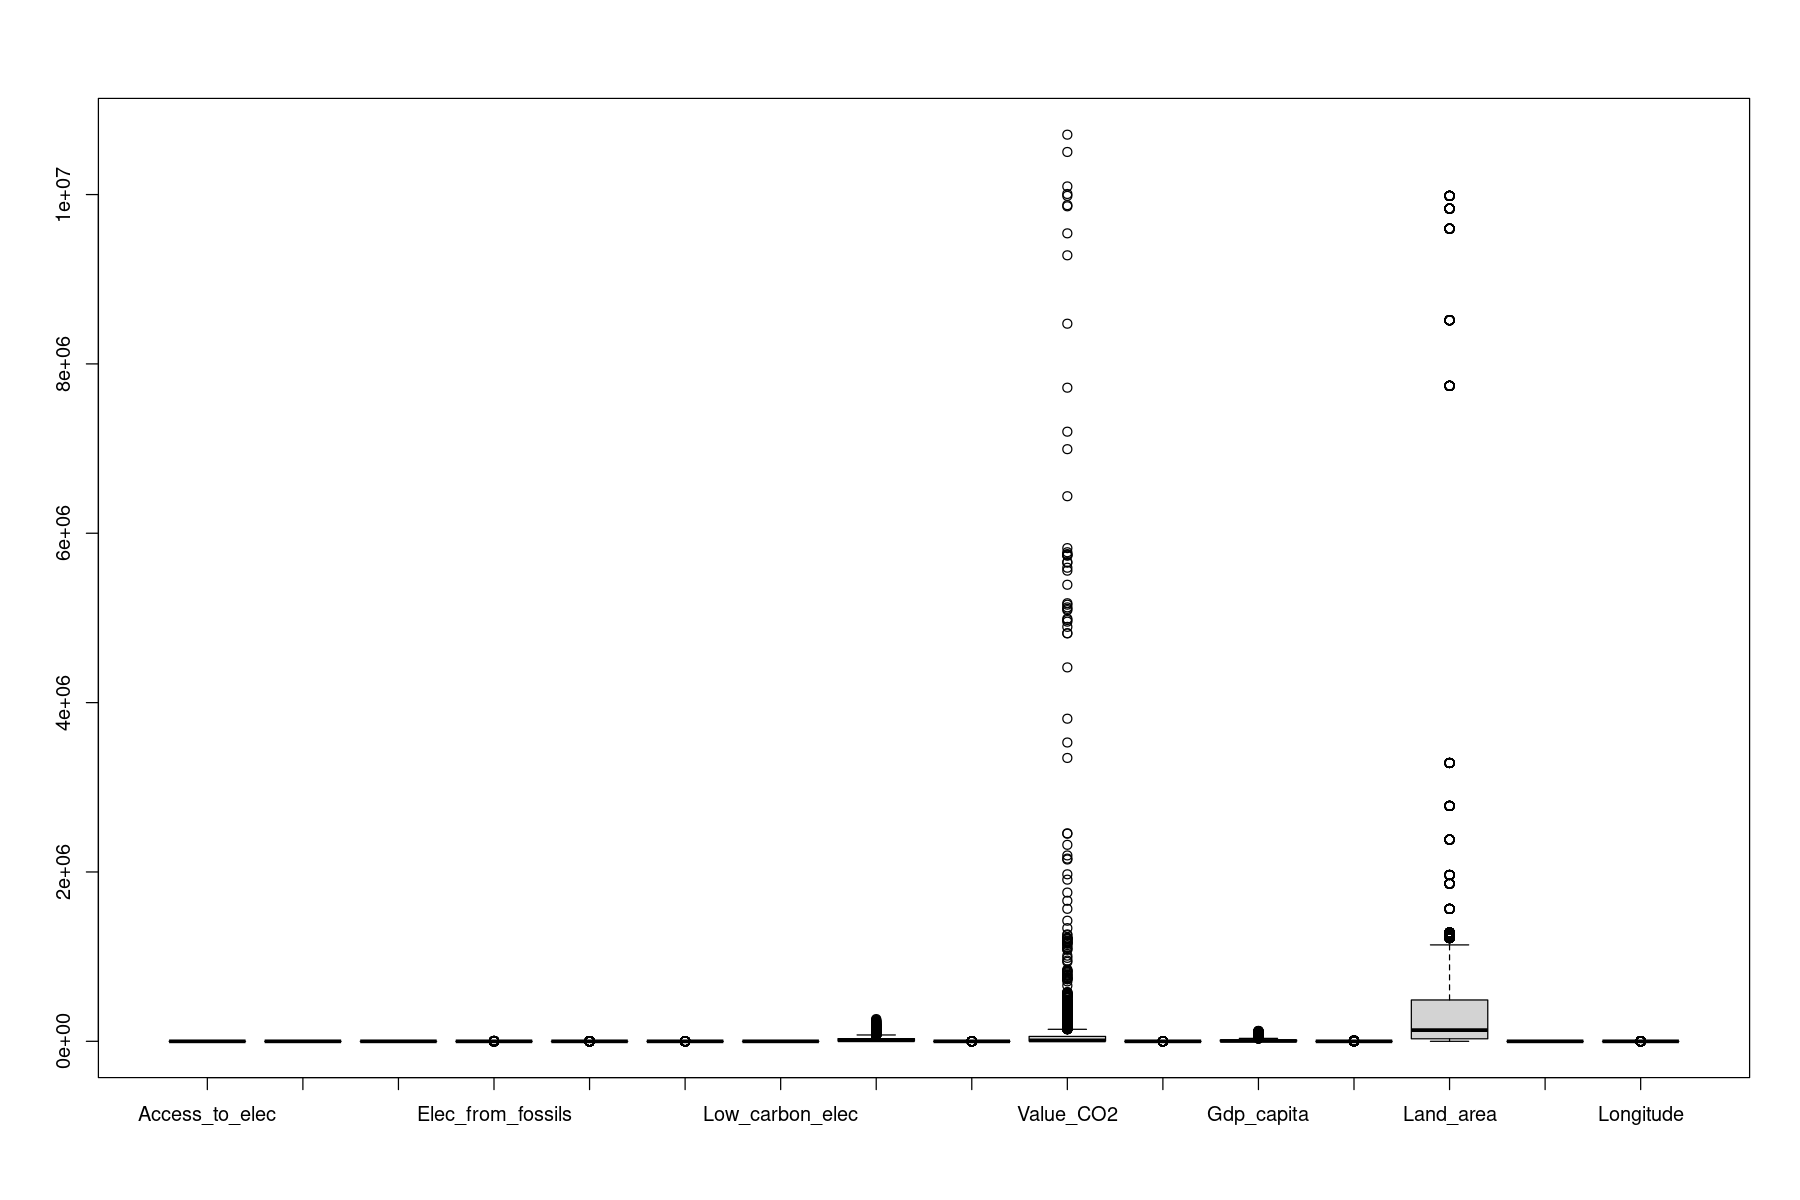

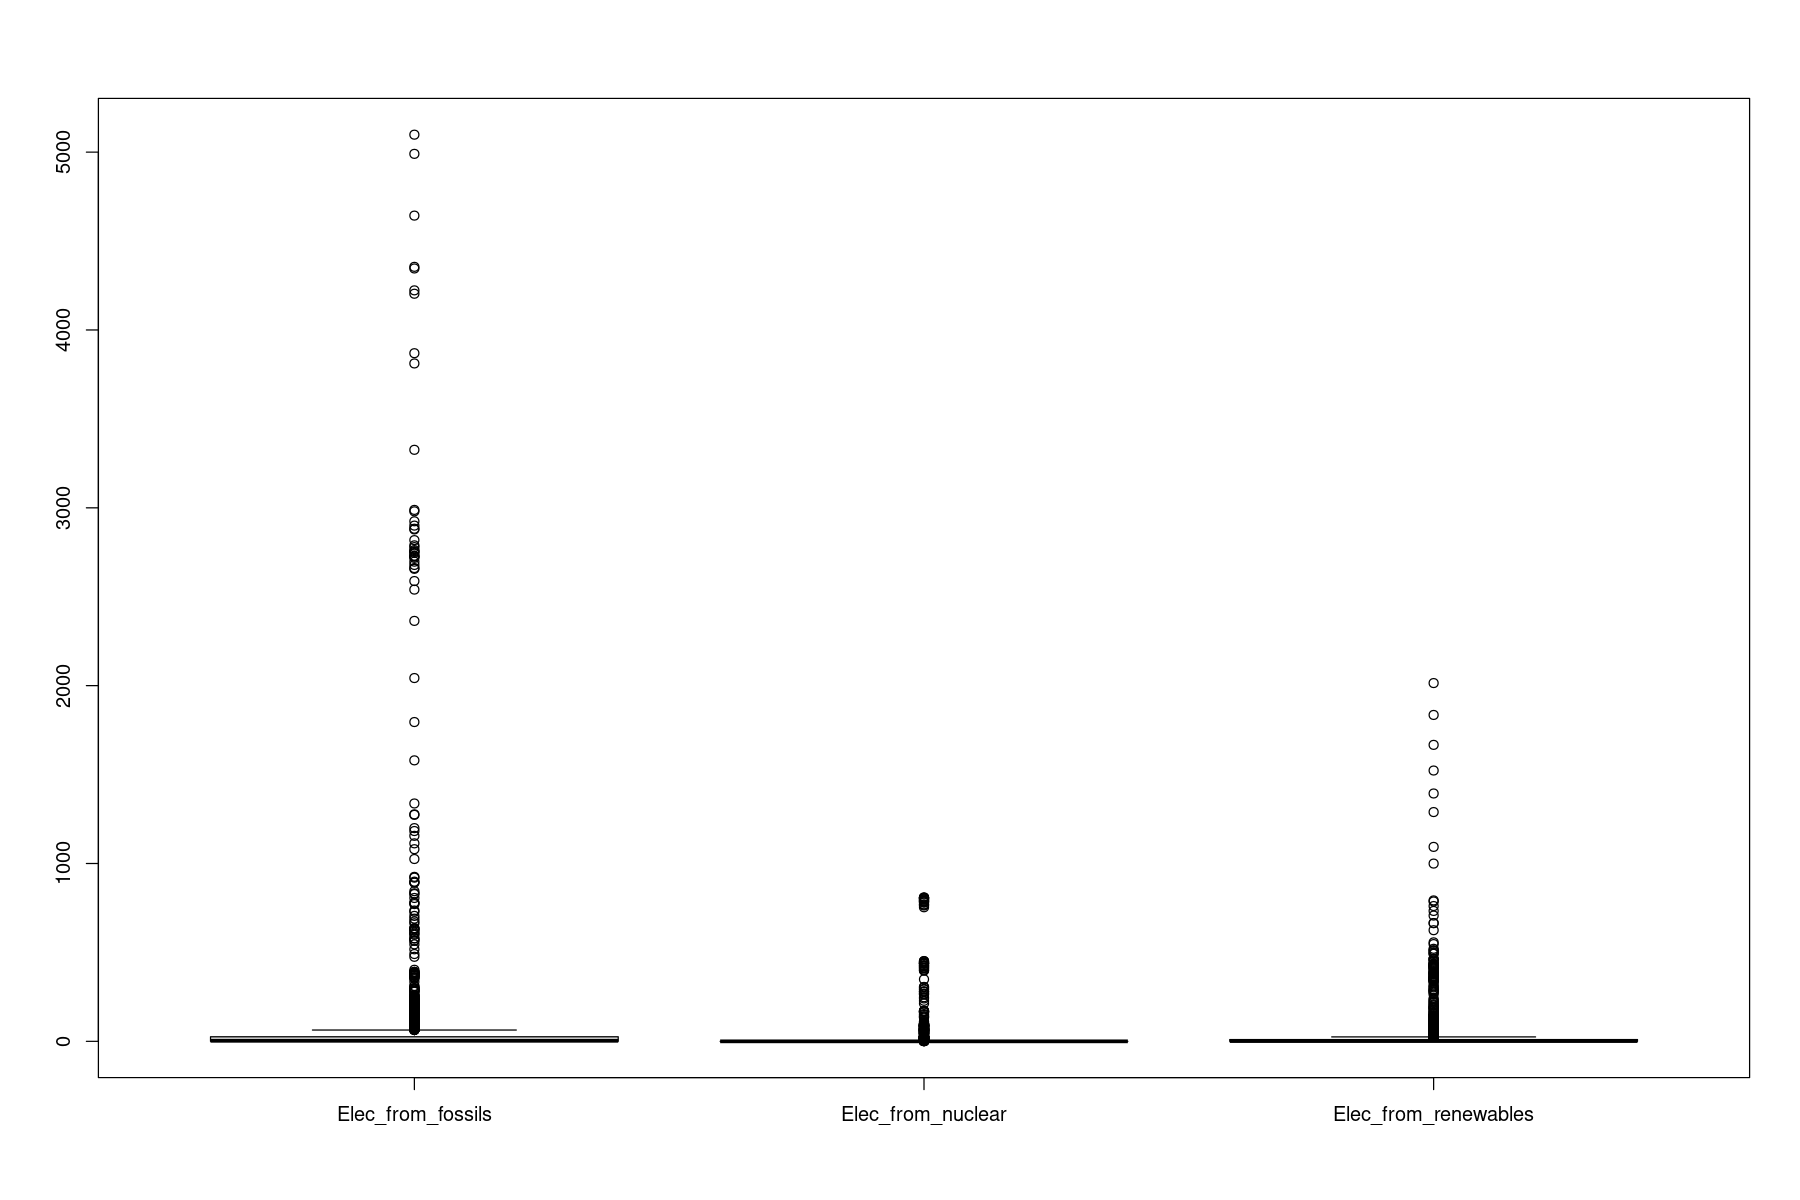

In [48]:
options(repr.plot.width = 15, repr.plot.height = 10)

boxplot(data4[,-c(1,2)]) # on voit pas grand chose : pas les mêmes unités et échelles

boxplot(data4[,c(6:8)]) # boxplot electricity : on n'y voit rien : trop de outliers

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

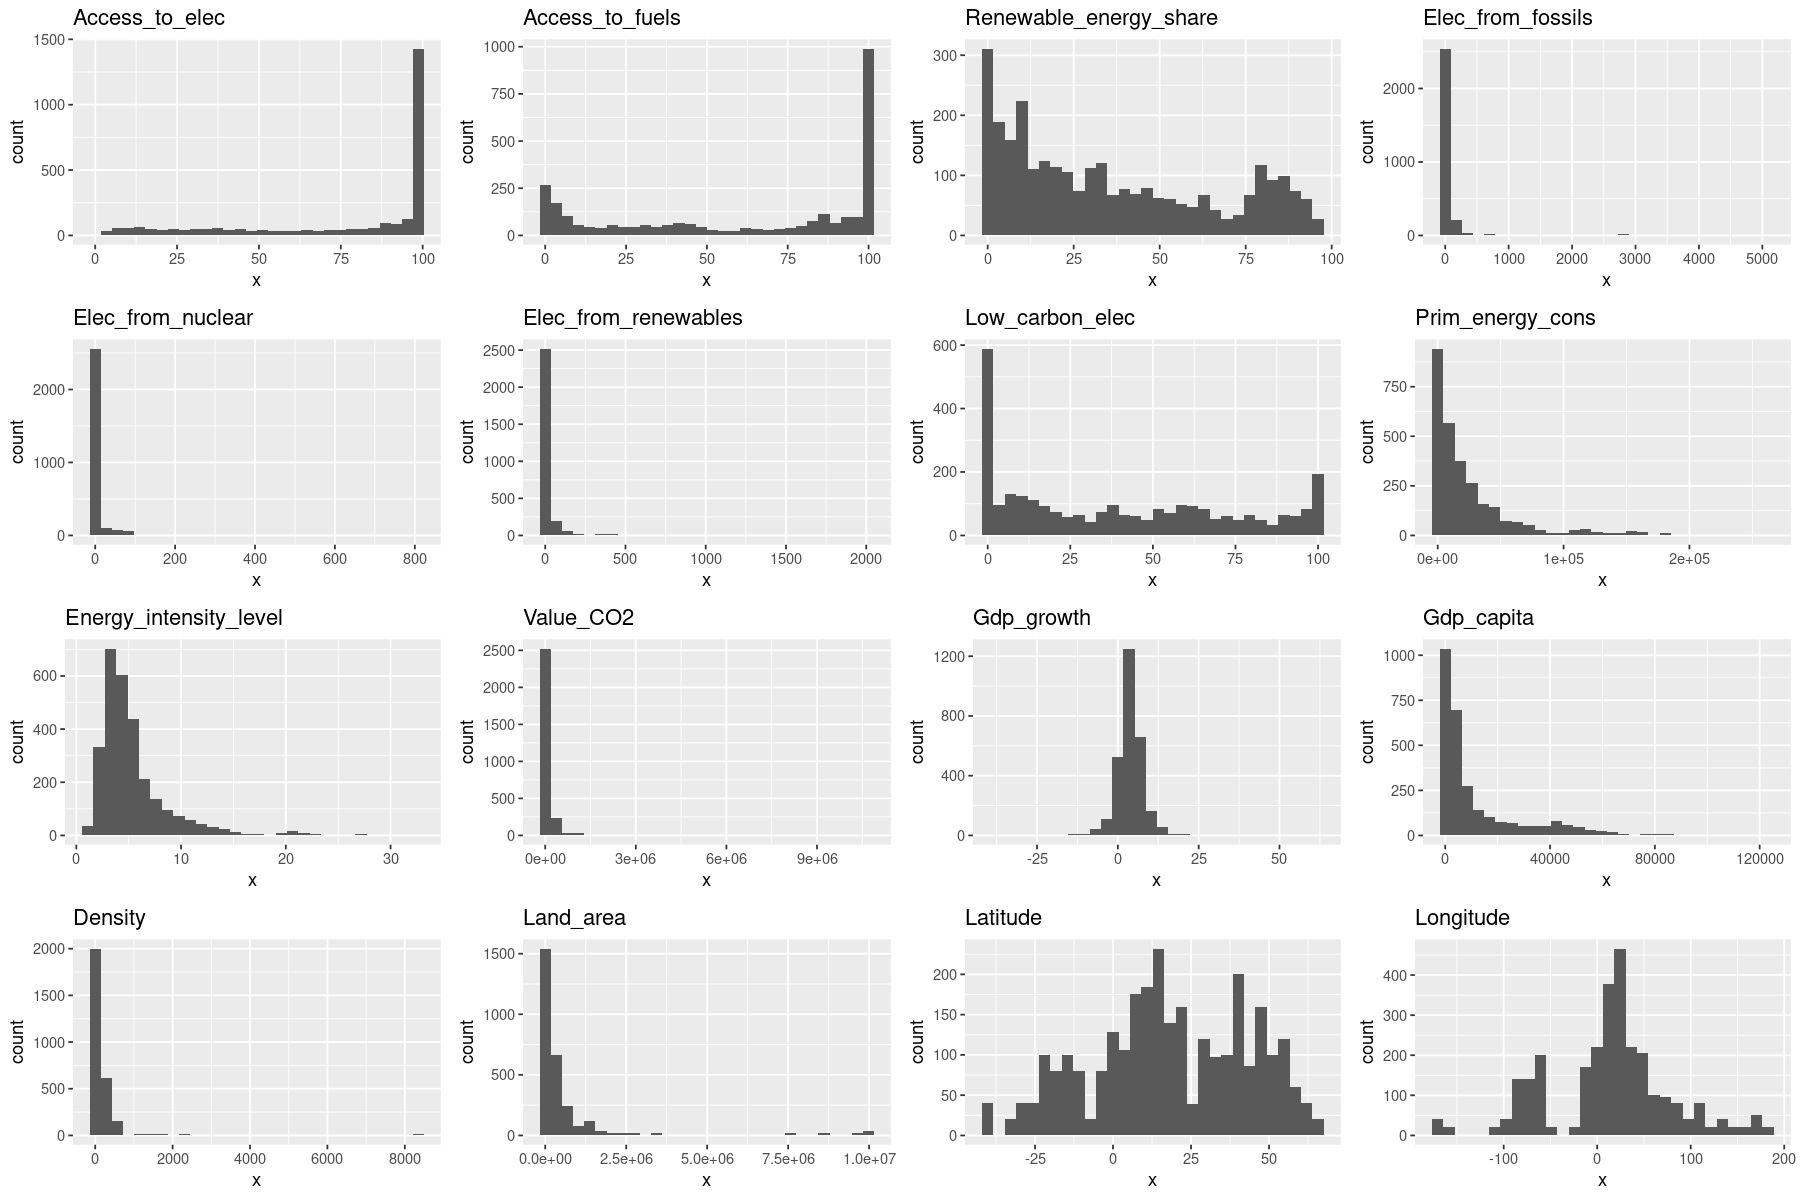

In [49]:
# tentative d'histogrammes par boucle

p = list()
j=1

for (i in names(data4)){
    # on n'affiche que l'histogramme des variables quantitatives
    if (is.numeric(data4[[i]])) {
        data_copy <- data4[[i]] # on créé une copie des données à chaque itération
        p[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=i)
    } 
}
                 
grid.arrange(grobs=p)

D'après les histogrammes, on peut voir que certaines variables ne sont pas gaussiennes. Or pour la suite nous aurons besoin de les rendre gaussiennes dans certains modèles. 
On souhaiterait transformer les variables suivantes en leur appliquant un log : 
- 

[1] "Access_to_fuels"
[1] "Renewable_energy_share"
[1] "Elec_from_fossils"
[1] "Elec_from_nuclear"
[1] "Elec_from_renewables"
[1] "Low_carbon_elec"
[1] "Gdp_growth"


Warning message in log(data4[, i] + 1):
“Production de NaN”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 225 rows containing non-finite values (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with 

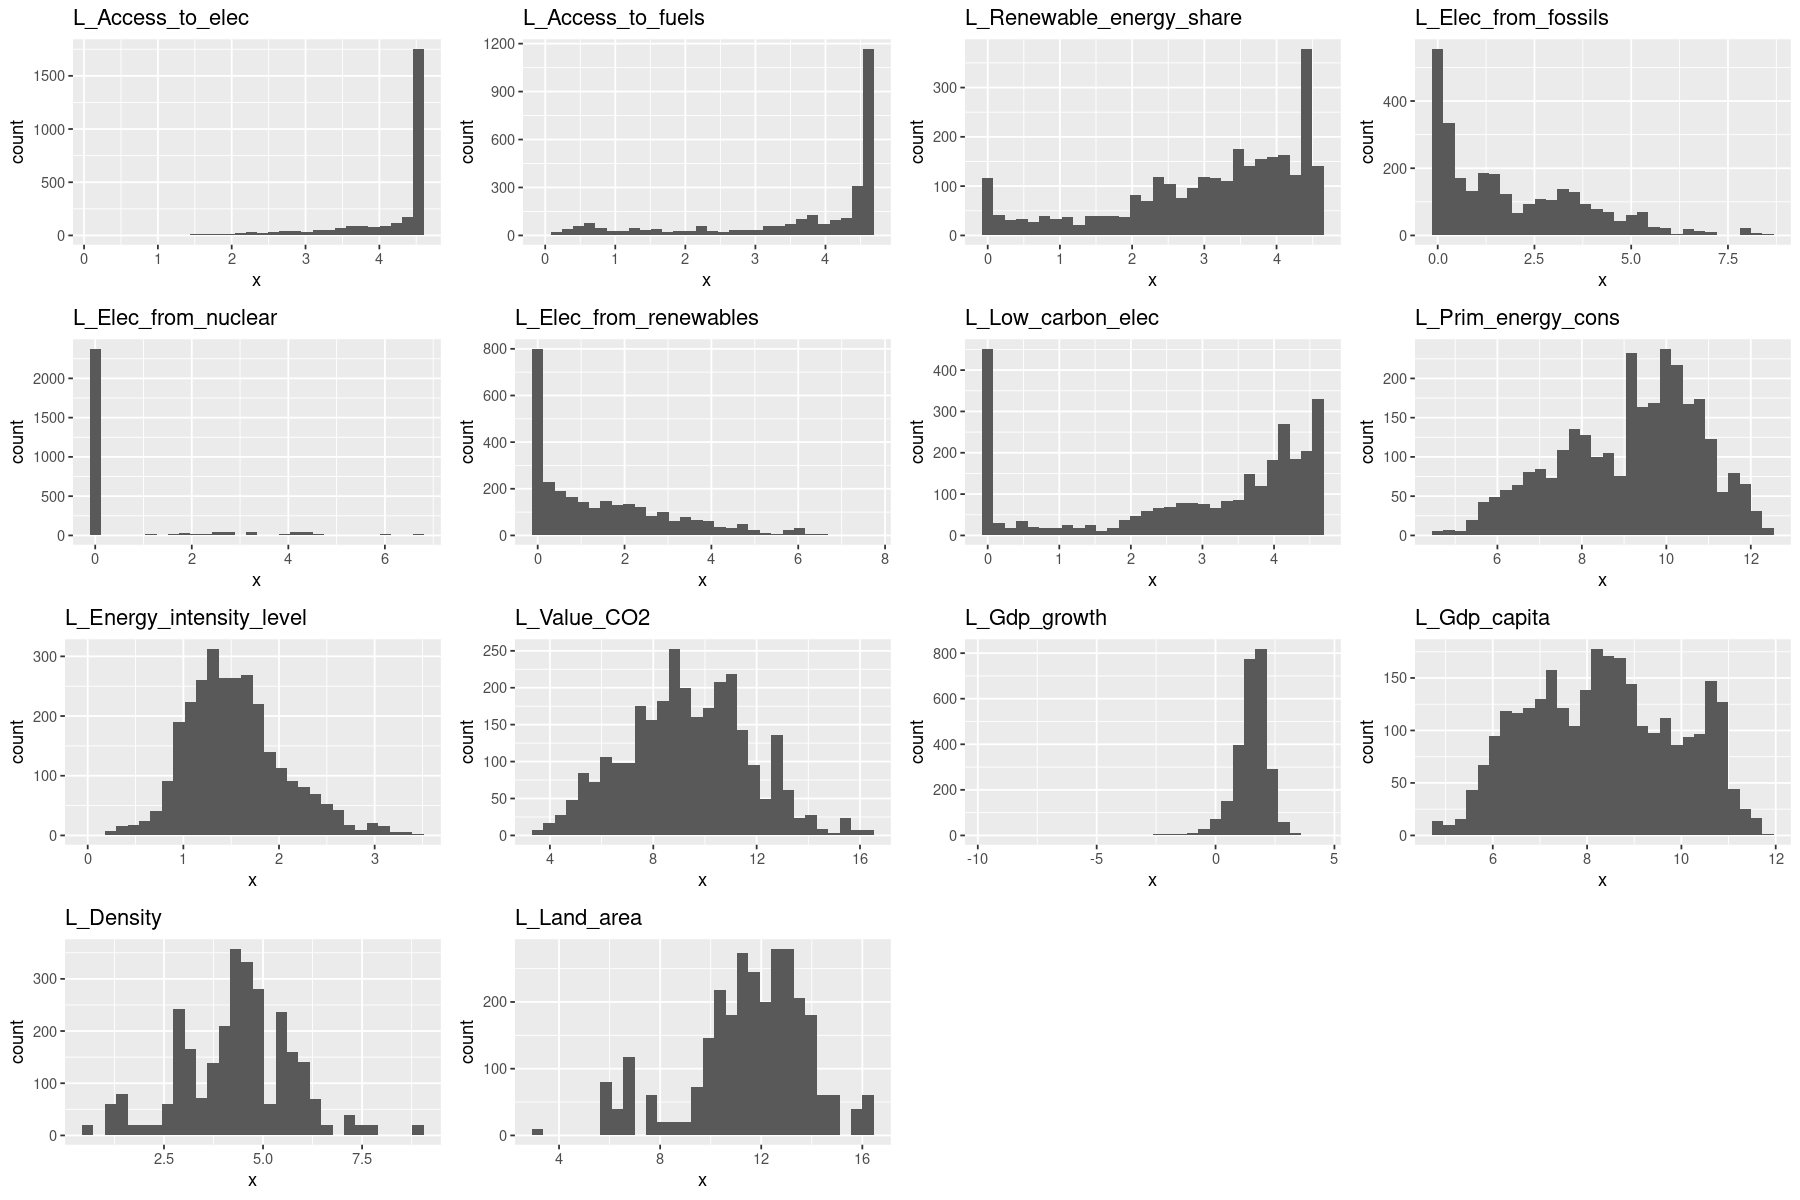

In [51]:
l = list()
Var_names = names(data4[,1:16])

for (i in Var_names){
    # on n'affiche que l'histogramme des variables quantitatives
    if (is.numeric(data4[[i]])) {
        L_var <- paste("L_",i,sep="")
        if (all(data4[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
            data4[,L_var] <- log(data4[,i])
        } else {
            print(i)
            data4[,L_var] <- log(data4[,i]+1)
        }
        data_copy <- data4[[L_var]] # on créé une copie des données à chaque itération
        l[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=L_var)
    } 
}
                 
grid.arrange(grobs=l)

In [52]:
str(data4)

'data.frame':	2868 obs. of  32 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils       : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables    : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons        : num  230 204 252 304 354 ...
 $ Energy_intensity_level  : num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita       

In [53]:
data5 <- data4[,c(1,2,3,4,5,22,23,24,9,26,27,12,13,30,31,32,17,18)]
str(data5)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ L_Elec_from_fossils     : num  0.27 0.285 0.293 0.182 0.182 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.489 0.445 0.464 0.495 0.56 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ L_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ L_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ L_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 ...
 $ L_Den

In [19]:

# h3 <- ggplot(data4, , stat="count", aes(x=colnames(data4[3]))) + geom_histogram(aes(y=colnames(data4[12]))) + geom_density(alpha = 0.2, fill = "orange")

# h4 <- ggplot(data4, aes(x=colnames(data4[3]))) + geom_hist()



# barplot(data4$Access.to.electricity....of.population.)

# 


#h3 <- ggplot(data4, aes(x=Access_to_elec)) + geom_histogram()
#h4 <- ggplot(data4, aes(x=Access_to_fuels)) + geom_histogram()
#h5 <- ggplot(data4, aes(x=Renewable_energy_share)) + geom_histogram()
#h6 <- ggplot(data4, aes(x=Elec_from_fossils)) + geom_histogram()
#h7 <- ggplot(data4, aes(x=Elec_from_nuclear)) + geom_histogram()
#h8 <- ggplot(data4, aes(x=Elec_from_renewables)) + geom_histogram()
#h9 <- ggplot(data4, aes(x=Low_carbon_elec)) + geom_histogram()
#h10 <- ggplot(data4, aes(x=Prim_energy_cons)) + geom_histogram()
#h11 <- ggplot(data4, aes(x=Energy_intensity_level)) + geom_histogram()
#h12 <- ggplot(data4, aes(x=Value_CO2)) + geom_histogram()
#h13 <- ggplot(data4, aes(x=Gdp_growth)) + geom_histogram()
#h14 <- ggplot(data4, aes(x=Gdp_capita)) + geom_histogram()
#h15 <- ggplot(data4, aes(x=Density)) + geom_histogram()
#h16 <- ggplot(data4, aes(x=Land_area)) + geom_histogram()
#h17 <- ggplot(data4, aes(x=Latitude)) + geom_histogram()
#h18 <- ggplot(data4, aes(x=Longitude)) + geom_histogram()

#grid.arrange(h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18 ,ncol=3)

In [20]:
#options(repr.plot.width = 15, repr.plot.height = 30)

#data4[,"l_Access_to_elec"] = log(data4[,"Access_to_elec"])
#data4[,"s_Access_to_elec"] = sqrt(data4[,"Access_to_elec"])

#data4[,"l_Elec_from_fossils"] = log(data4[,"Elec_from_fossils"])
#data4[,"s_Elec_from_fossils"] = sqrt(data4[,"Elec_from_fossils"])

#data4[,"l_Elec_from_nuclear"] = log(data4[,"Elec_from_nuclear"]+1)
#data4[,"s_Elec_from_nuclear"] = sqrt(data4[,"Elec_from_nuclear"])

#data4[,"l_Elec_from_renewables"] = log(data4[,"Elec_from_renewables"])
#data4[,"s_Elec_from_renewables"] = sqrt(data4[,"Elec_from_renewables"])

#data4[,"l_Prim_energy_cons"] = log(data4[,"Prim_energy_cons"])
#data4[,"s_Prim_energy_cons"] = sqrt(data4[,"Prim_energy_cons"])

#data4[,"l_Energy_intensity_level"] = log(data4[,"Energy_intensity_level"])
#data4[,"s_Energy_intensity_level"] = sqrt(data4[,"Energy_intensity_level"])

#data4[,"l_Value_CO2"] = log(data4[,"Value_CO2"])
#data4[,"s_Value_CO2"] = sqrt(data4[,"Value_CO2"])

#data4[,"l_Gdp_growth"] = log(data4[,"Gdp_growth"])
#data4[,"s_Gdp_growth"] = sqrt(data4[,"Gdp_growth"])

#data4[,"l_Gdp_capita"] = log(data4[,"Gdp_capita"])
#data4[,"s_Gdp_capita"] = sqrt(data4[,"Gdp_capita"])

#data4[,"l_Density"] = log(data4[,"Density"])
#data4[,"s_Density"] = sqrt(data4[,"Density"])

#data4[,"l_Land_area"] = log(data4[,"Land_area"])
#data4[,"s_Land_area"] = sqrt(data4[,"Land_area"])

#h19 <- ggplot(data4, aes(x=l_Access_to_elec)) + geom_histogram()
#h20 <- ggplot(data4, aes(x=s_Access_to_elec)) + geom_histogram()

#h21 <- ggplot(data4, aes(x=l_Elec_from_fossils)) + geom_histogram()
#h22 <- ggplot(data4, aes(x=s_Elec_from_fossils)) + geom_histogram()

#h23 <- ggplot(data4, aes(x=l_Elec_from_nuclear)) + geom_histogram()
#h24 <- ggplot(data4, aes(x=s_Elec_from_nuclear)) + geom_histogram()

#h25 <- ggplot(data4, aes(x=l_Elec_from_renewables)) + geom_histogram()
#h26 <- ggplot(data4, aes(x=s_Elec_from_renewables)) + geom_histogram()

#h27 <- ggplot(data4, aes(x=l_Prim_energy_cons)) + geom_histogram()
#h28 <- ggplot(data4, aes(x=s_Prim_energy_cons)) + geom_histogram()

#h29 <- ggplot(data4, aes(x=l_Energy_intensity_level)) + geom_histogram()
#h30 <- ggplot(data4, aes(x=s_Energy_intensity_level)) + geom_histogram()

#h31 <- ggplot(data4, aes(x=l_Value_CO2)) + geom_histogram()
#h32 <- ggplot(data4, aes(x=s_Value_CO2)) + geom_histogram()

#h33 <- ggplot(data4, aes(x=l_Gdp_growth)) + geom_histogram()
#h34 <- ggplot(data4, aes(x=s_Gdp_growth)) + geom_histogram()

#h35 <- ggplot(data4, aes(x=l_Gdp_capita)) + geom_histogram()
#h36 <- ggplot(data4, aes(x=s_Gdp_capita)) + geom_histogram()

#h37 <- ggplot(data4, aes(x=l_Density)) + geom_histogram()
#h38 <- ggplot(data4, aes(x=s_Density)) + geom_histogram()

#h39 <- ggplot(data4, aes(x=l_Land_area)) + geom_histogram()
#h40 <- ggplot(data4, aes(x=s_Land_area)) + geom_histogram()


#grid.arrange(h3, h19, h20, h6, h21, h22, h7, h23, h24, h8, h25, h26, h10, h27, h28, h11, h29, h30, h12, h31, h32, h13, h33, h34, h14, h35, h36, h15, h37, h38, h16, h39, h40, ncol=3)


In [21]:
#str(data4)
#head(data4)

On va restandardiser : 

- On tente un log sur celles qui ont un pic d'un côté.
- On tente racine sur d'autres.

Proposition à faire à Emilight et Paolight :
- Gdp grosse en sqrt et le reste en log point final à la ligne arretez de discuter.

Et on enlève celle qu'on utilise plus.

In [22]:
# A RUN UNE SEULE FUCKING FOIS PAS DEUX PAS TROIS ESPECE DE GROS CON 

# data4 <- data4[,c(1, 2, 3, 4, 5, 21, 23, 25, 9, 27, 29, 12, 34, 35, 37, 39, 17, 18)]
#str(data4)

**Nature des variables**

Faire blabla sur type des variables : en tout 18 variables 
- Entity et Year = 2 qualitatives (qui sont bien en facteurs)
- Le reste quantitative = 16 

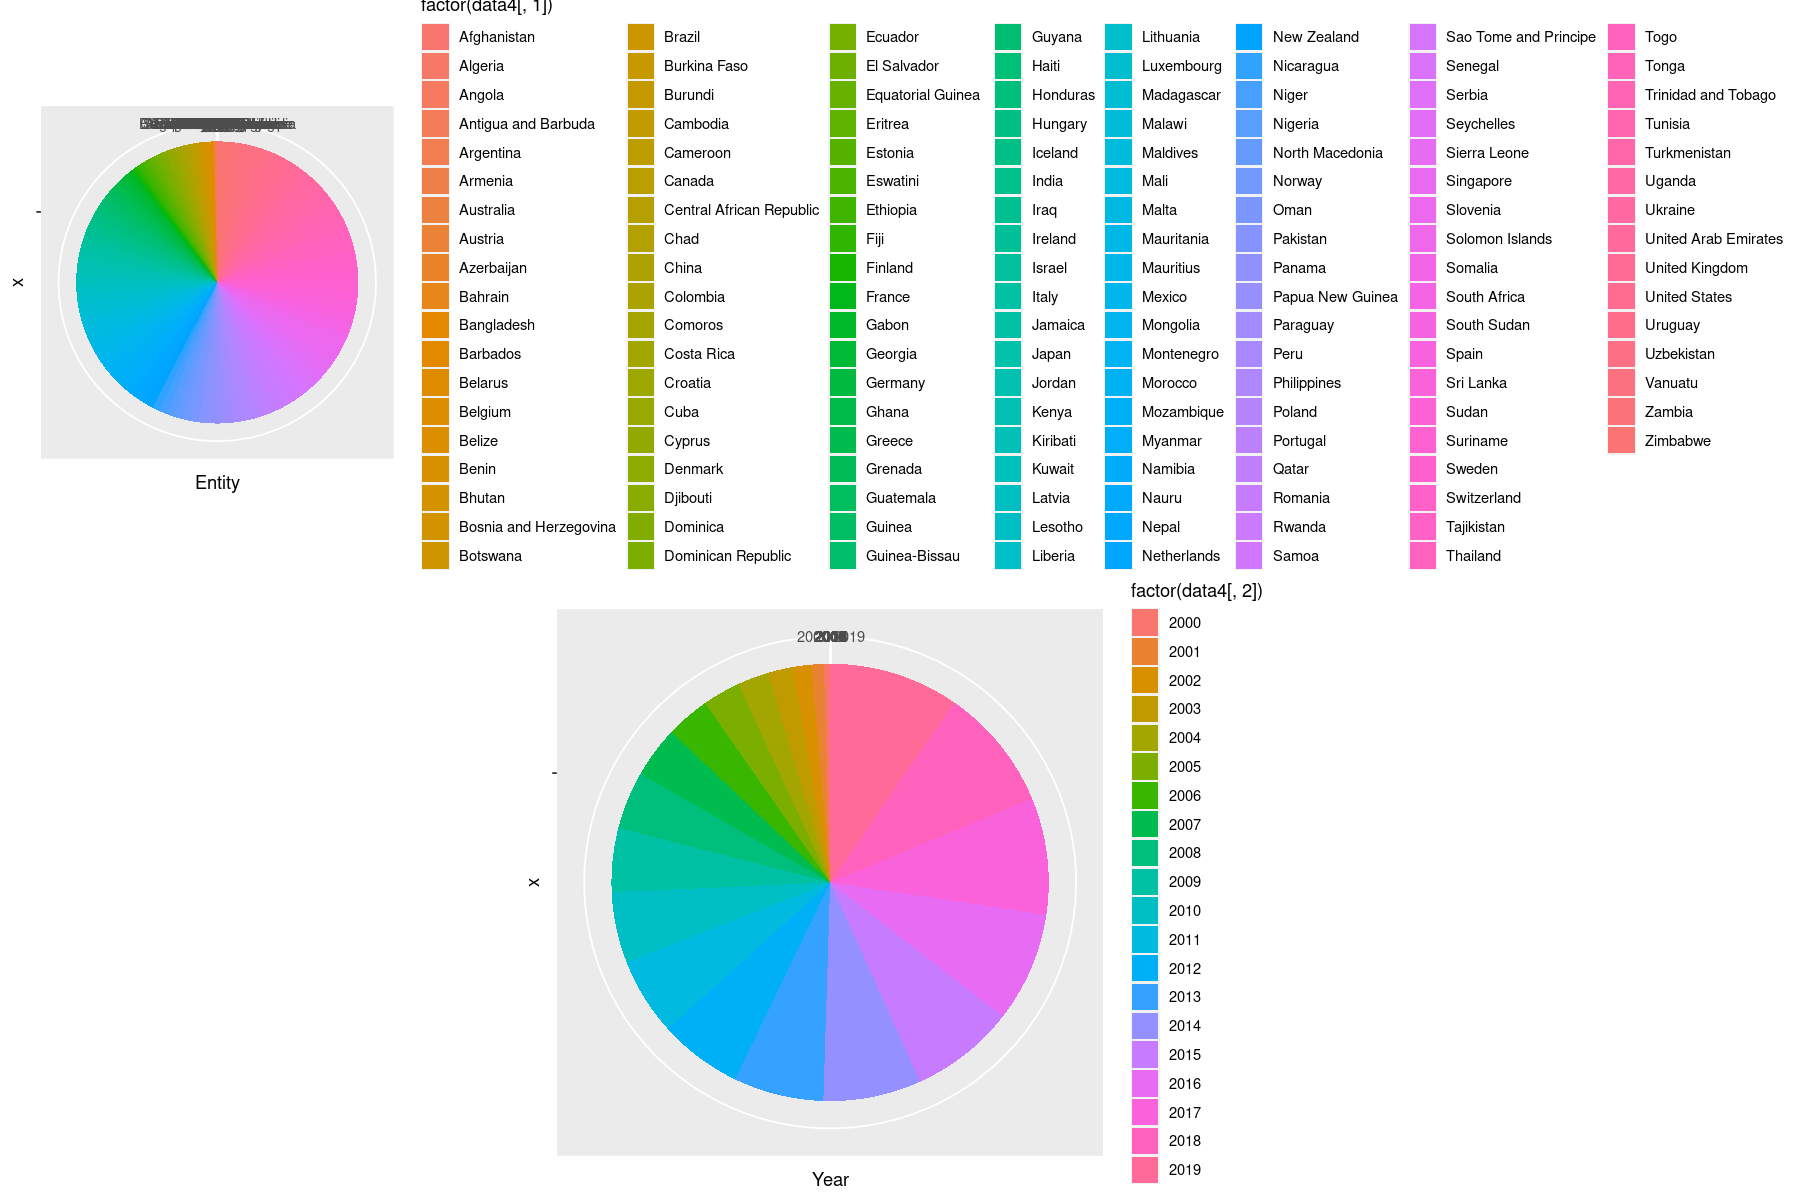

In [23]:
# Piechart

options(repr.plot.width = 15, repr.plot.height = 10)

p1 = ggplot(data4, aes(x="", y=Entity, fill=factor(data4[,1]))) + geom_col() + coord_polar(theta = "y")
p2 = ggplot(data4, aes(x="", y=Year, fill=factor(data4[,2]))) + geom_col() + coord_polar(theta = "y")

grid.arrange(p1,p2, ncol=1)

**Grande heterogeneite de CO2**

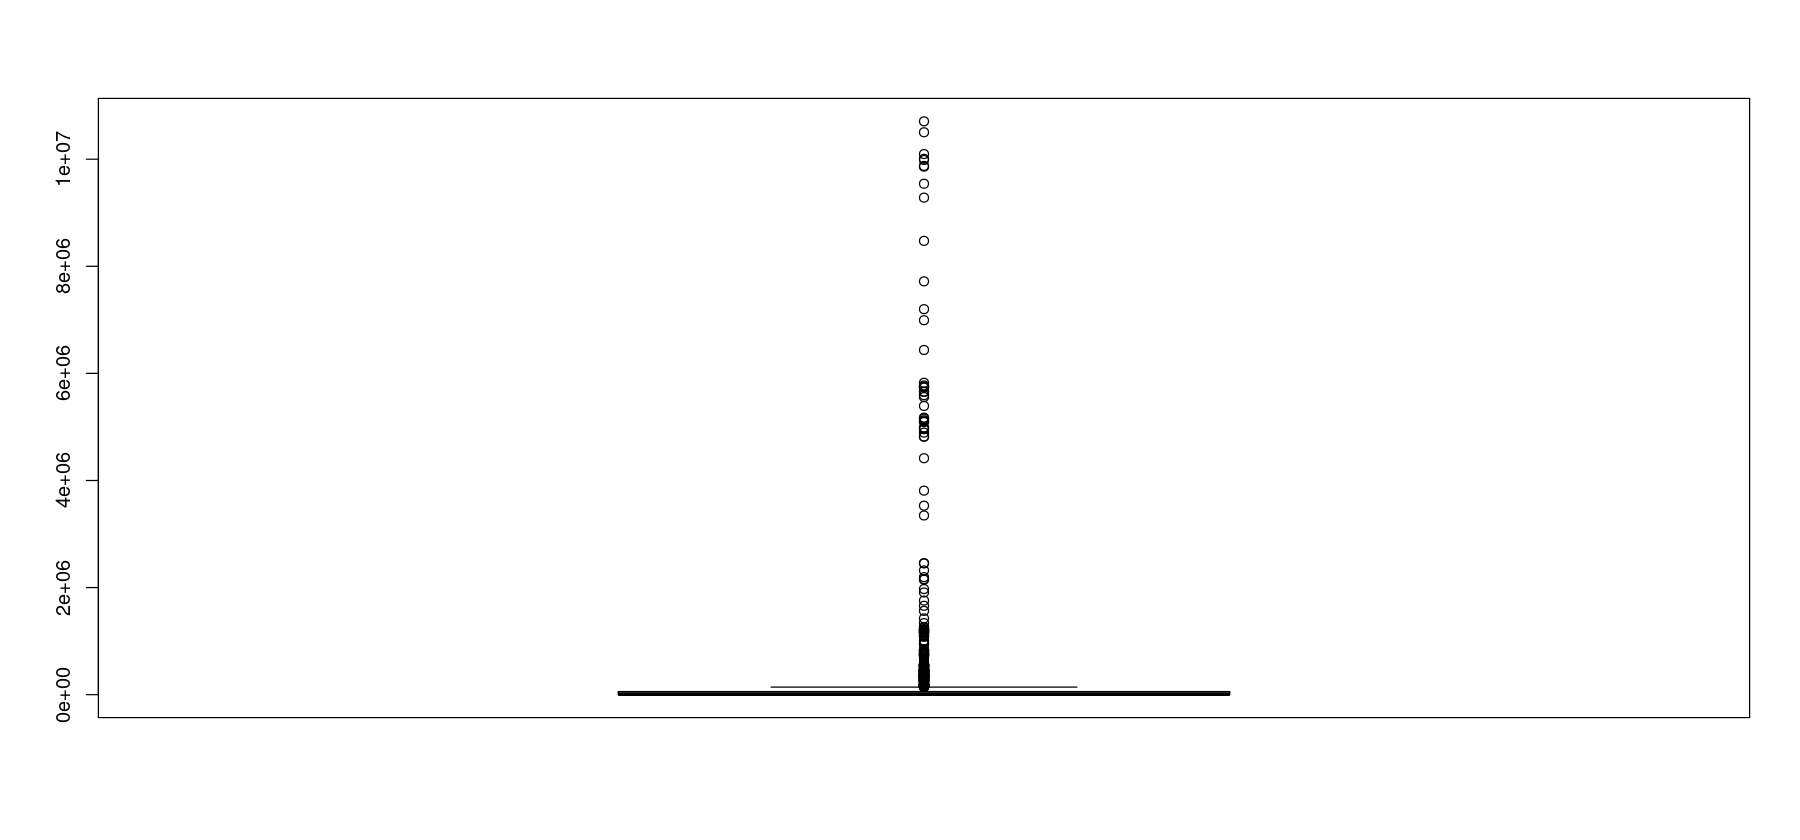

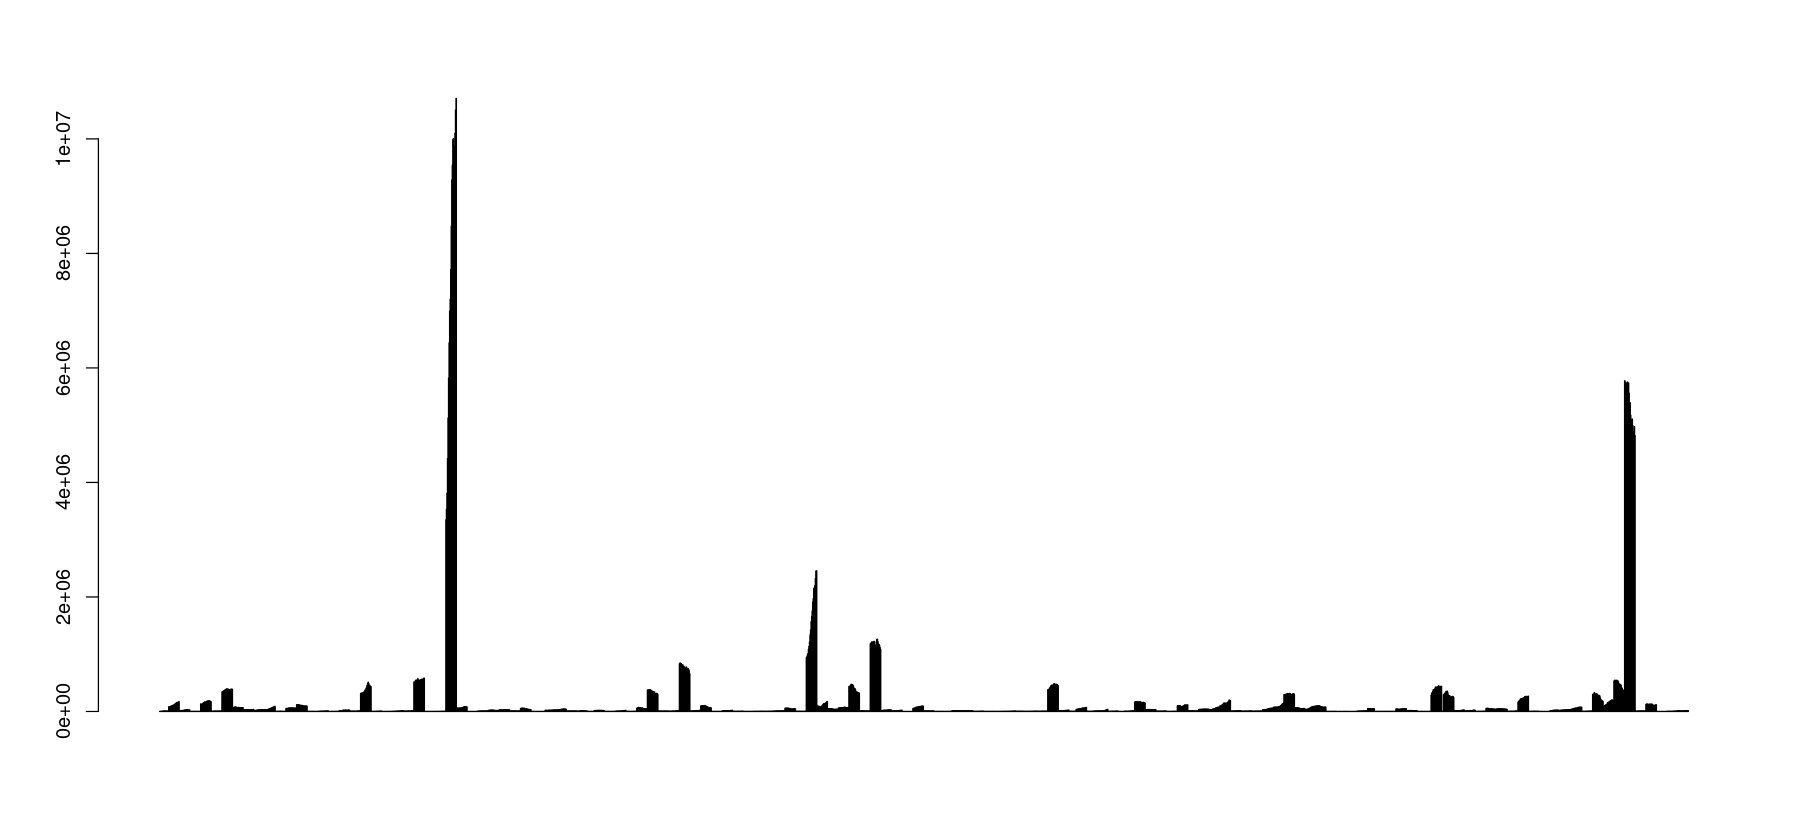

In [27]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data4[,12])
barplot(data4[,12])

In [54]:
nb_annee_pays = list()

j=1

for (i in levels(data4[,1])) {
    nb_annee_pays[[j]] = sum(grepl(i, data4$Entity))
    j=j+1
}

moy_value_co2 = list()

No = 1

for (j in levels(data4[["Entity"]])) {
    data_sub = subset(data4, data4$Entity==j)
    # moy_value_co2[[No]] = c(j, sum(data_sub[,12])/nb_annee_pays[[No]])
    moy_value_co2[[No]] = sum(data_sub[,12])/nb_annee_pays[[No]]
    No = No+1
}

moy_value_co2 = data.frame(moy_value_co2)

colnames(moy_value_co2) = levels(data4[["Entity"]])

# head(moy_value_co2)

# order(moy_value_co2)

moy_value_co2 = t(moy_value_co2)

colnames(moy_value_co2) = c("Moyenne_CO2")

head(moy_value_co2)

moy_ordonnee = order(moy_value_co2, decreasing=TRUE)

head(moy_value_co2[moy_ordonnee,])

,Moyenne_CO2
Afghanistan,4643.529
Albania,NaN
Algeria,119921.000
Angola,21689.500
Antigua and Barbuda,513.000
Argentina,160462.002


China United States         India         Japan       Germany 
    7636642.5     5329538.5     1633979.0     1183734.5      773644.5 
       Canada 
     547644.5

En faisant une moyenne de la consommation de CO2 des différents pays sur les années observées, on observe que les pays le splus polluants sont : 
- La Chine
- Les Etats-Unis
- L'Inde
- Le Japon
- L'Allemagne

### Analyse Descriptive Multidimensionnelle

In [41]:
# str(data5)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ L_Elec_from_fossils     : num  -1.17 -1.11 -1.08 -1.61 -1.61 ...
 $ L_Elec_from_nuclear     : num  -Inf -Inf -Inf -Inf -Inf ...
 $ L_Elec_from_renewables  : num  -0.462 -0.58 -0.528 -0.446 -0.288 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ L_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ L_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ L_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 .

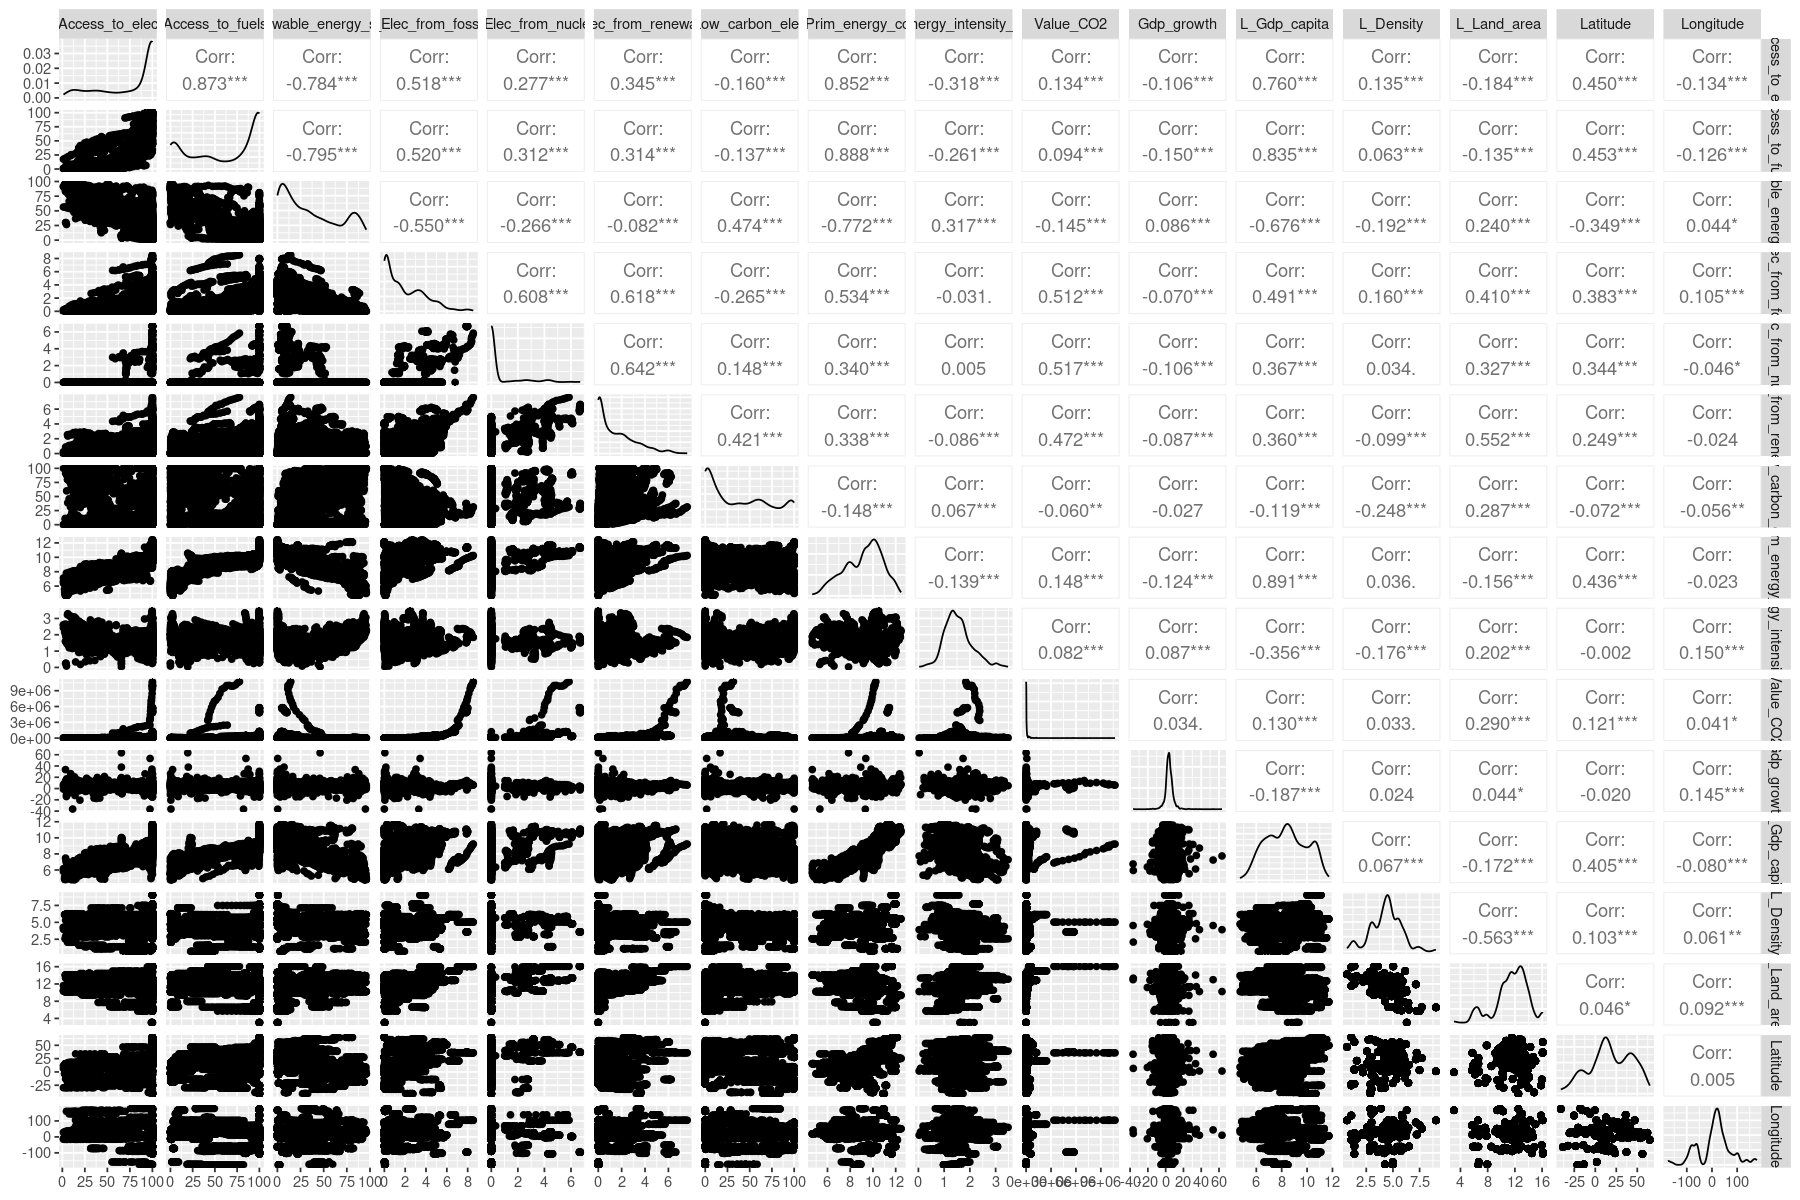

In [55]:
# on regarde les dépendances 2 à 2
ggpairs(data5[,c(3:18)])

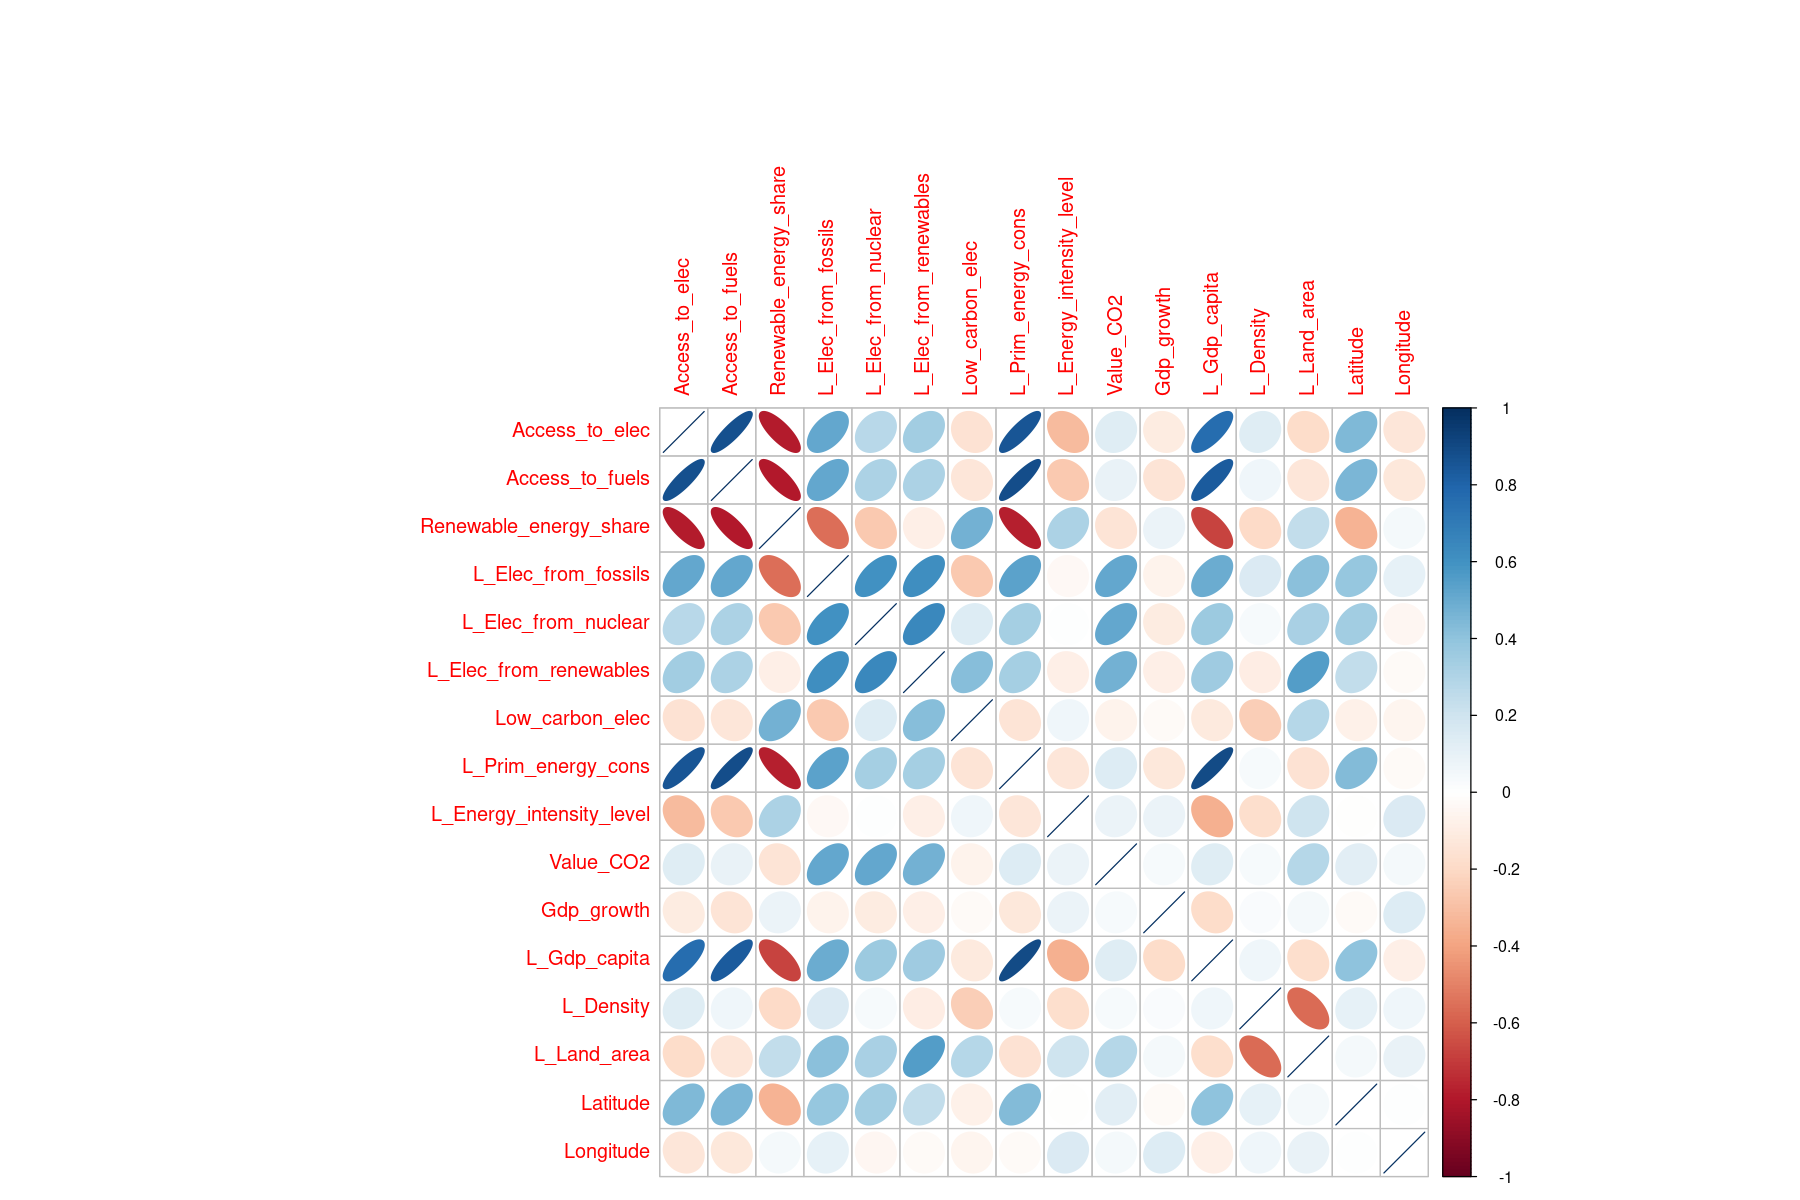

In [57]:
corrplot(cor(data5[,3:18]),method="ellipse")

D'après le graphe des corrélations, on peut remarquer de fortes corrélations positives entre :
- Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita
- plus faiblement : L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables

On peut aussi observer des corrélations négatives entre : 
- Renewable_energy_share et Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita
- plus faiblement : L_Land_area et L_Density

### Analyse en Composantes Principales

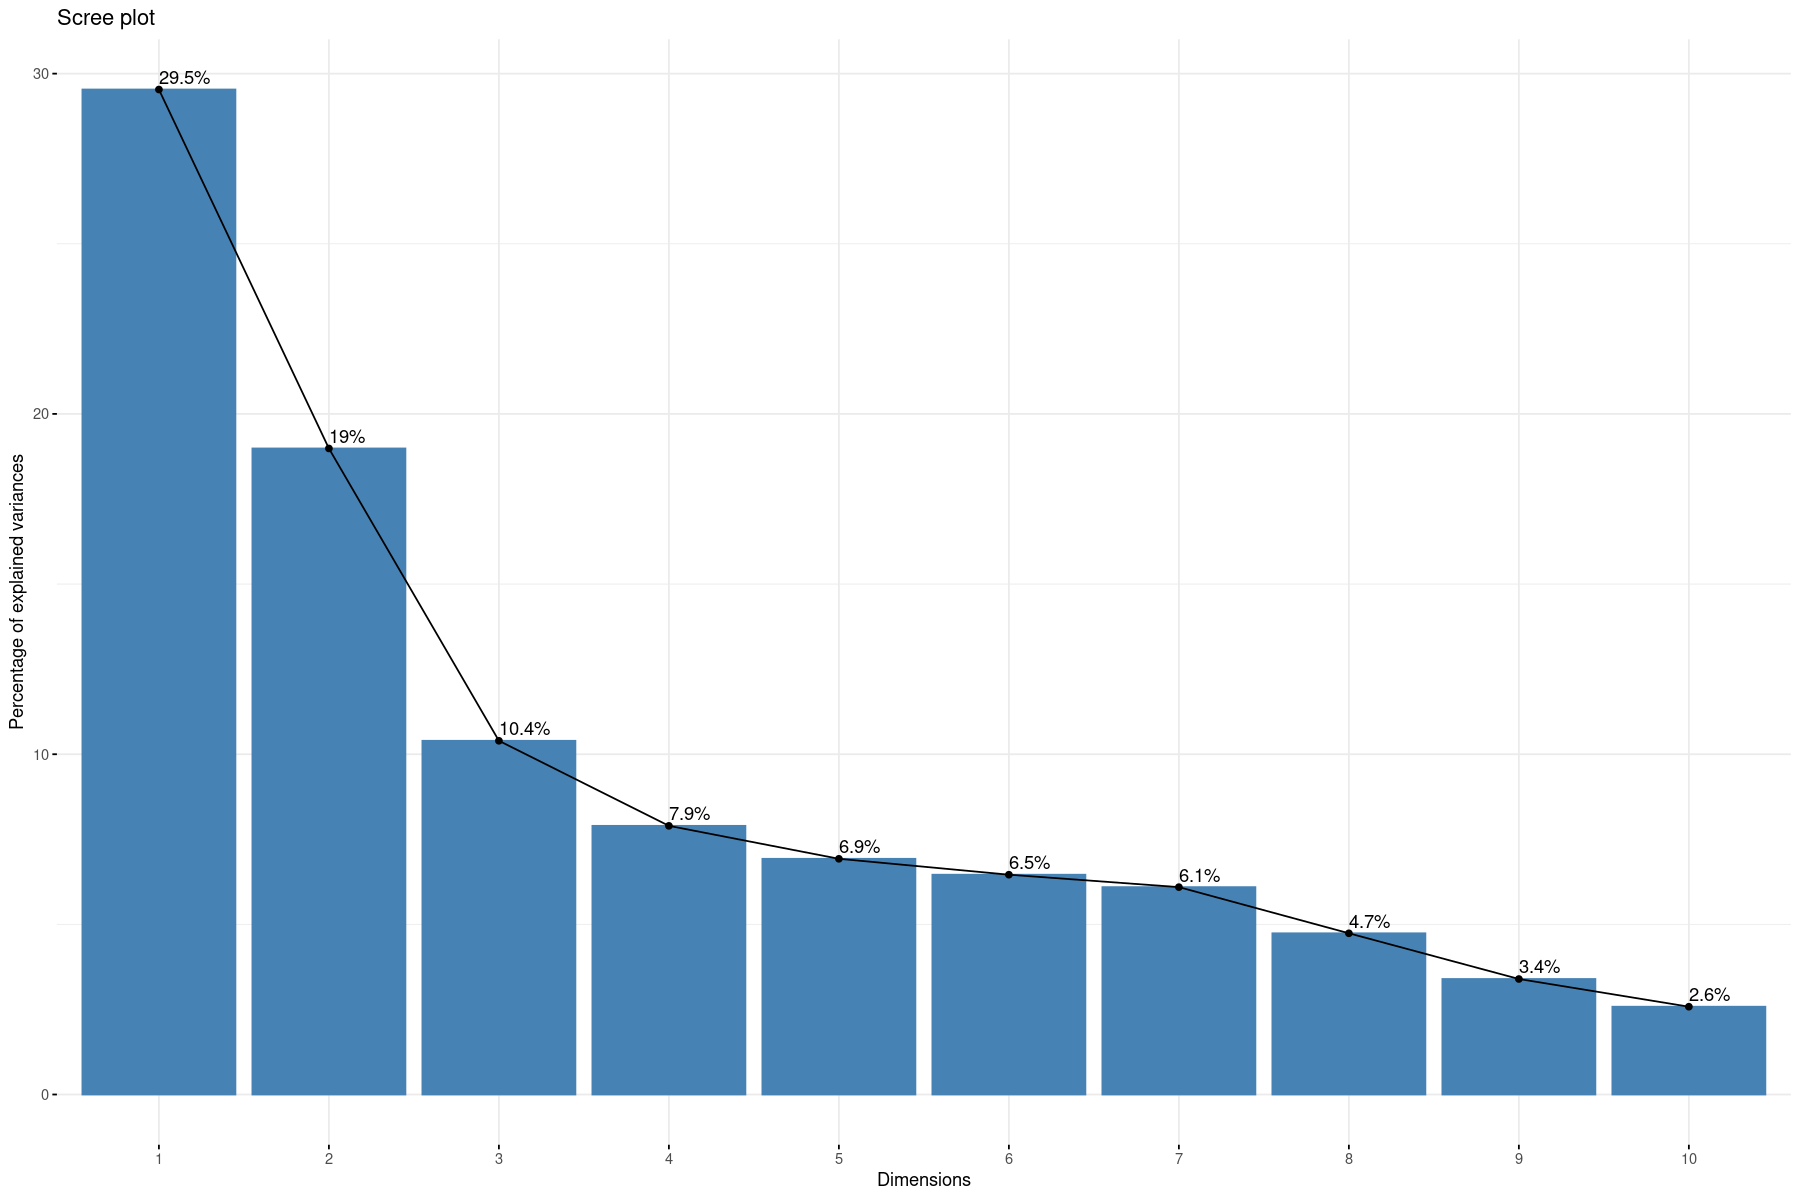

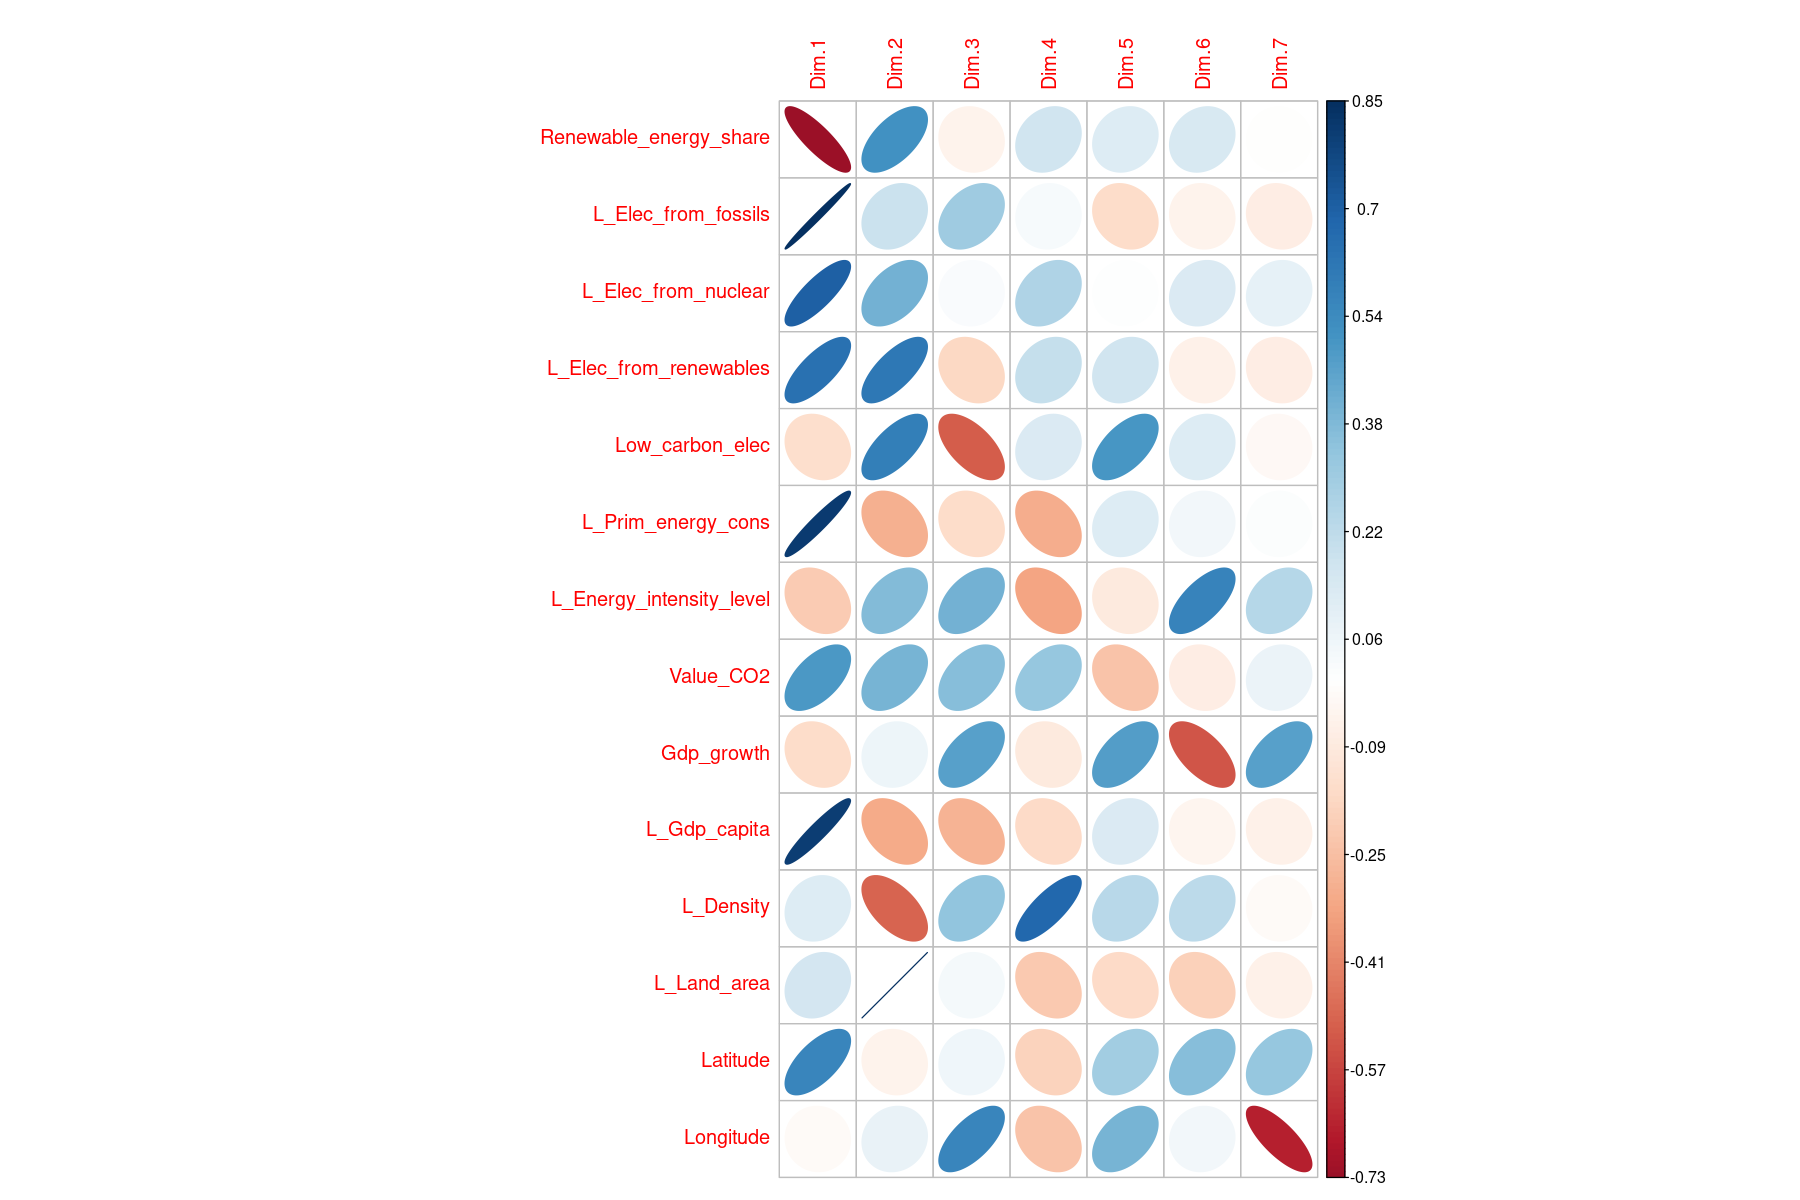

In [65]:
acp <- PCA(data5[,3:18], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 7)
# Décroissance des valeurs propres

g1<-fviz_eig(acp, addlabels = TRUE)
g1

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

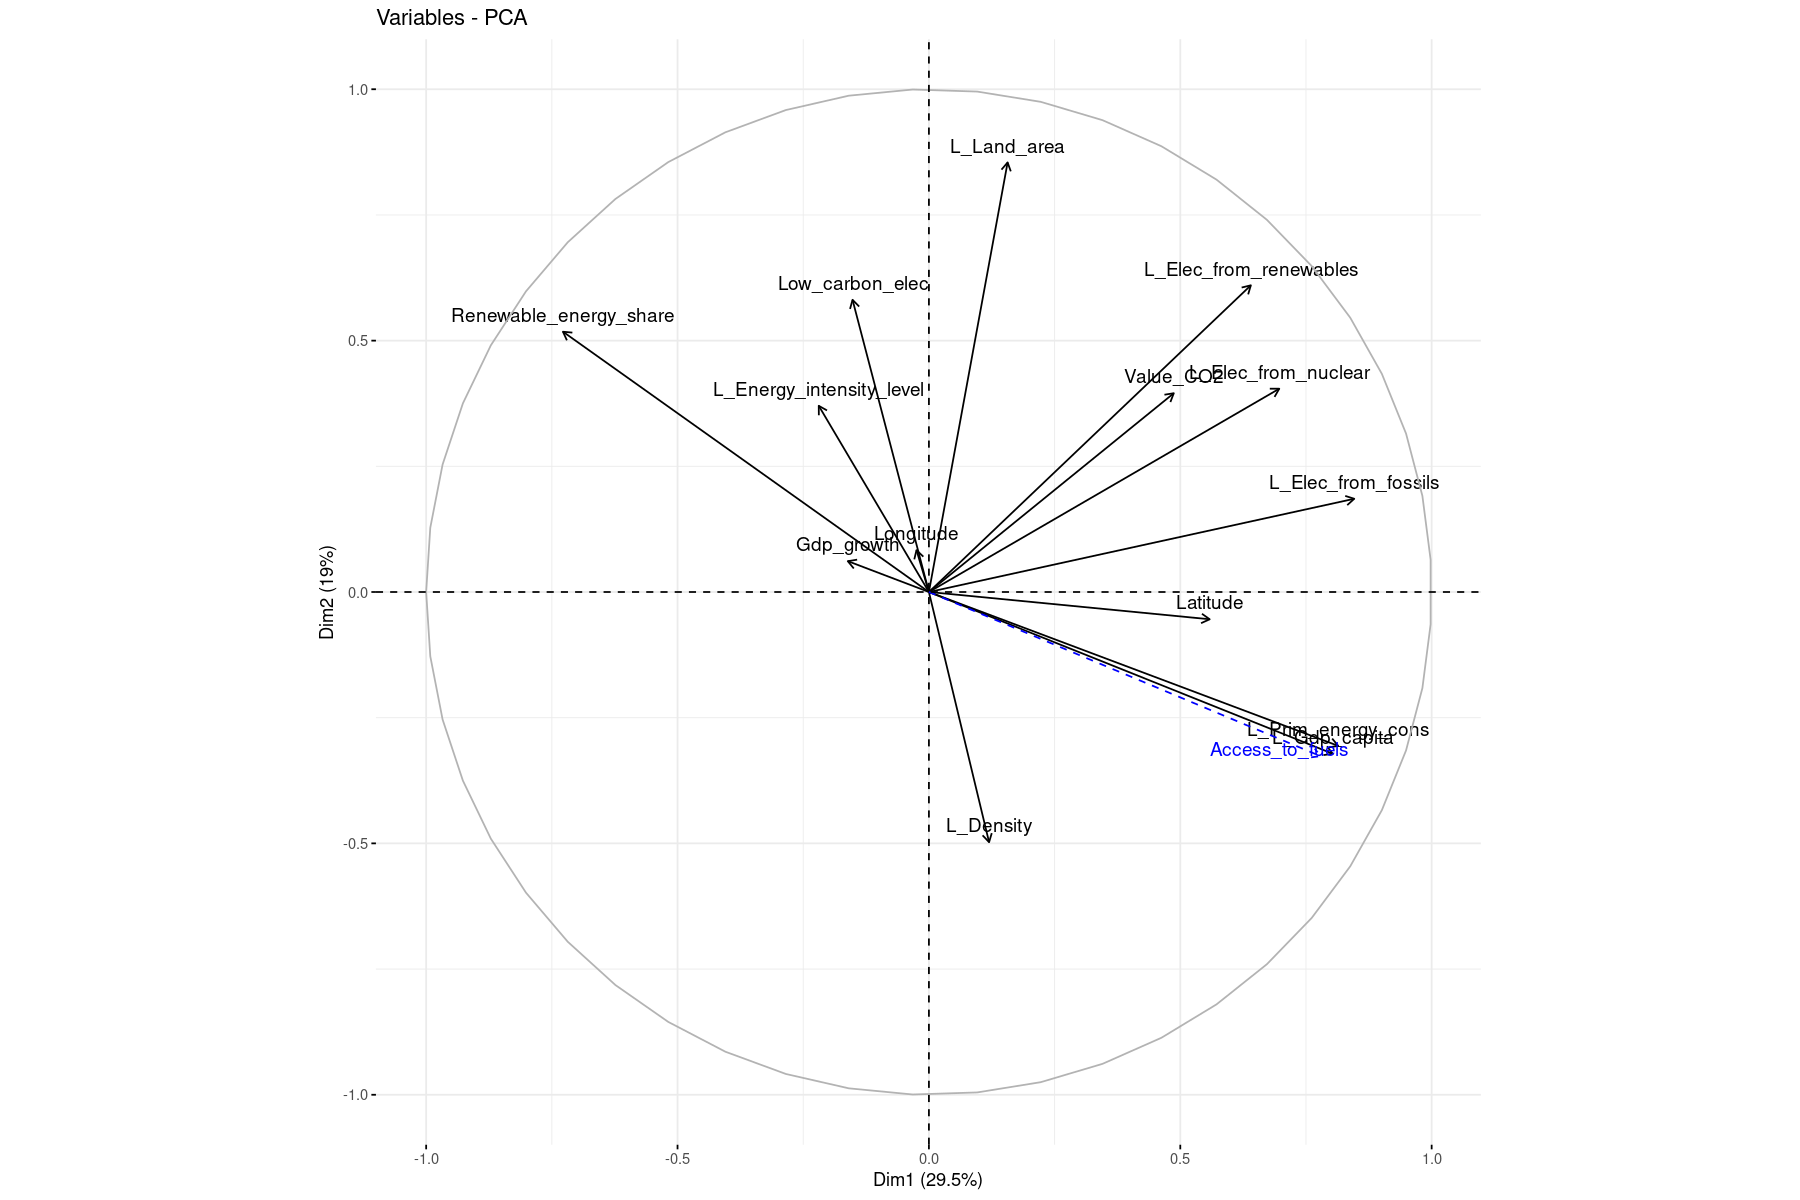

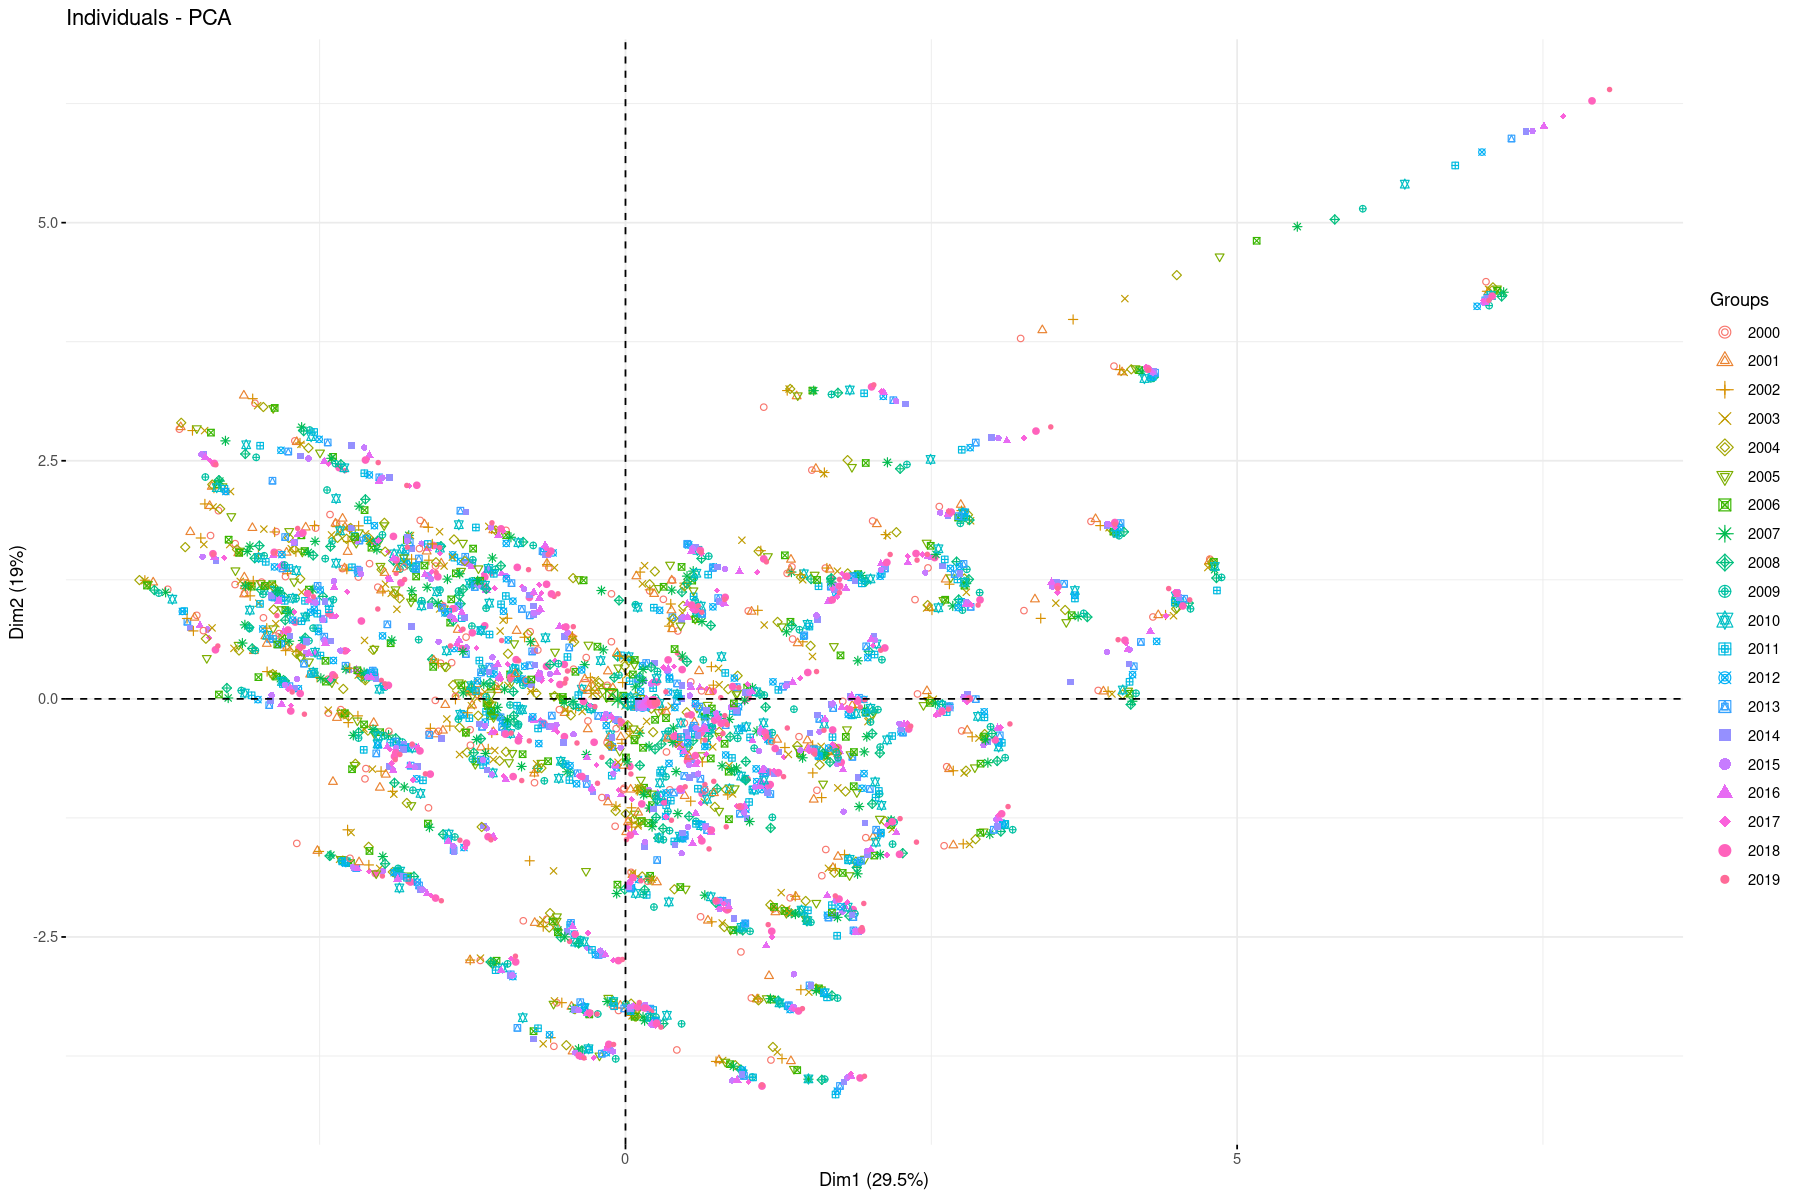

In [71]:
fviz_pca_var(acp)
# fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_ind(acp, label="none", habillage=data5$Year)

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '29'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '130' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '133' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '133' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '133' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '133' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '133' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '133' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '133' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '133' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '137' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '143' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '143' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '143' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '143' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '143' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '143' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '143' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '144' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '147' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '147' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '147' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '147' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '147' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '147' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '147' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '147' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '29'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '31'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '31'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '128' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '128' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
War

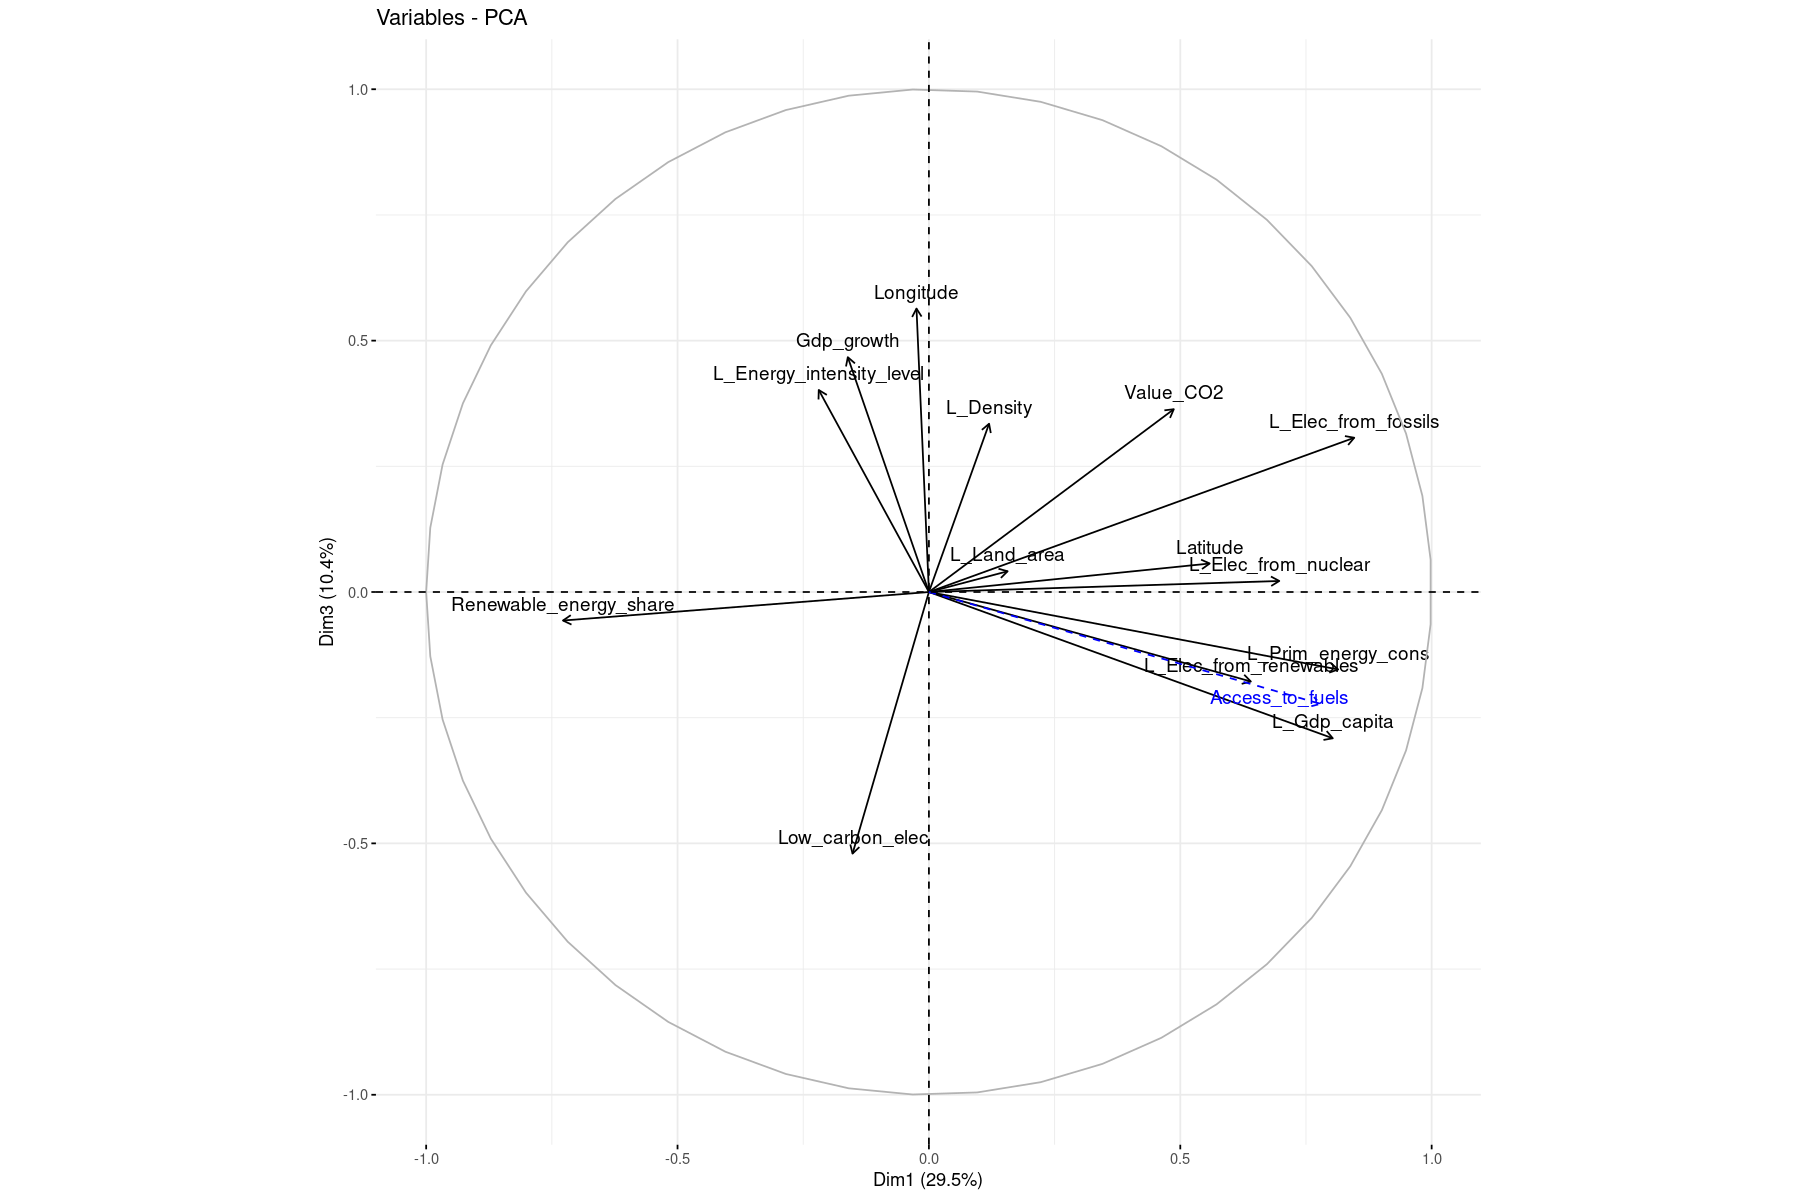

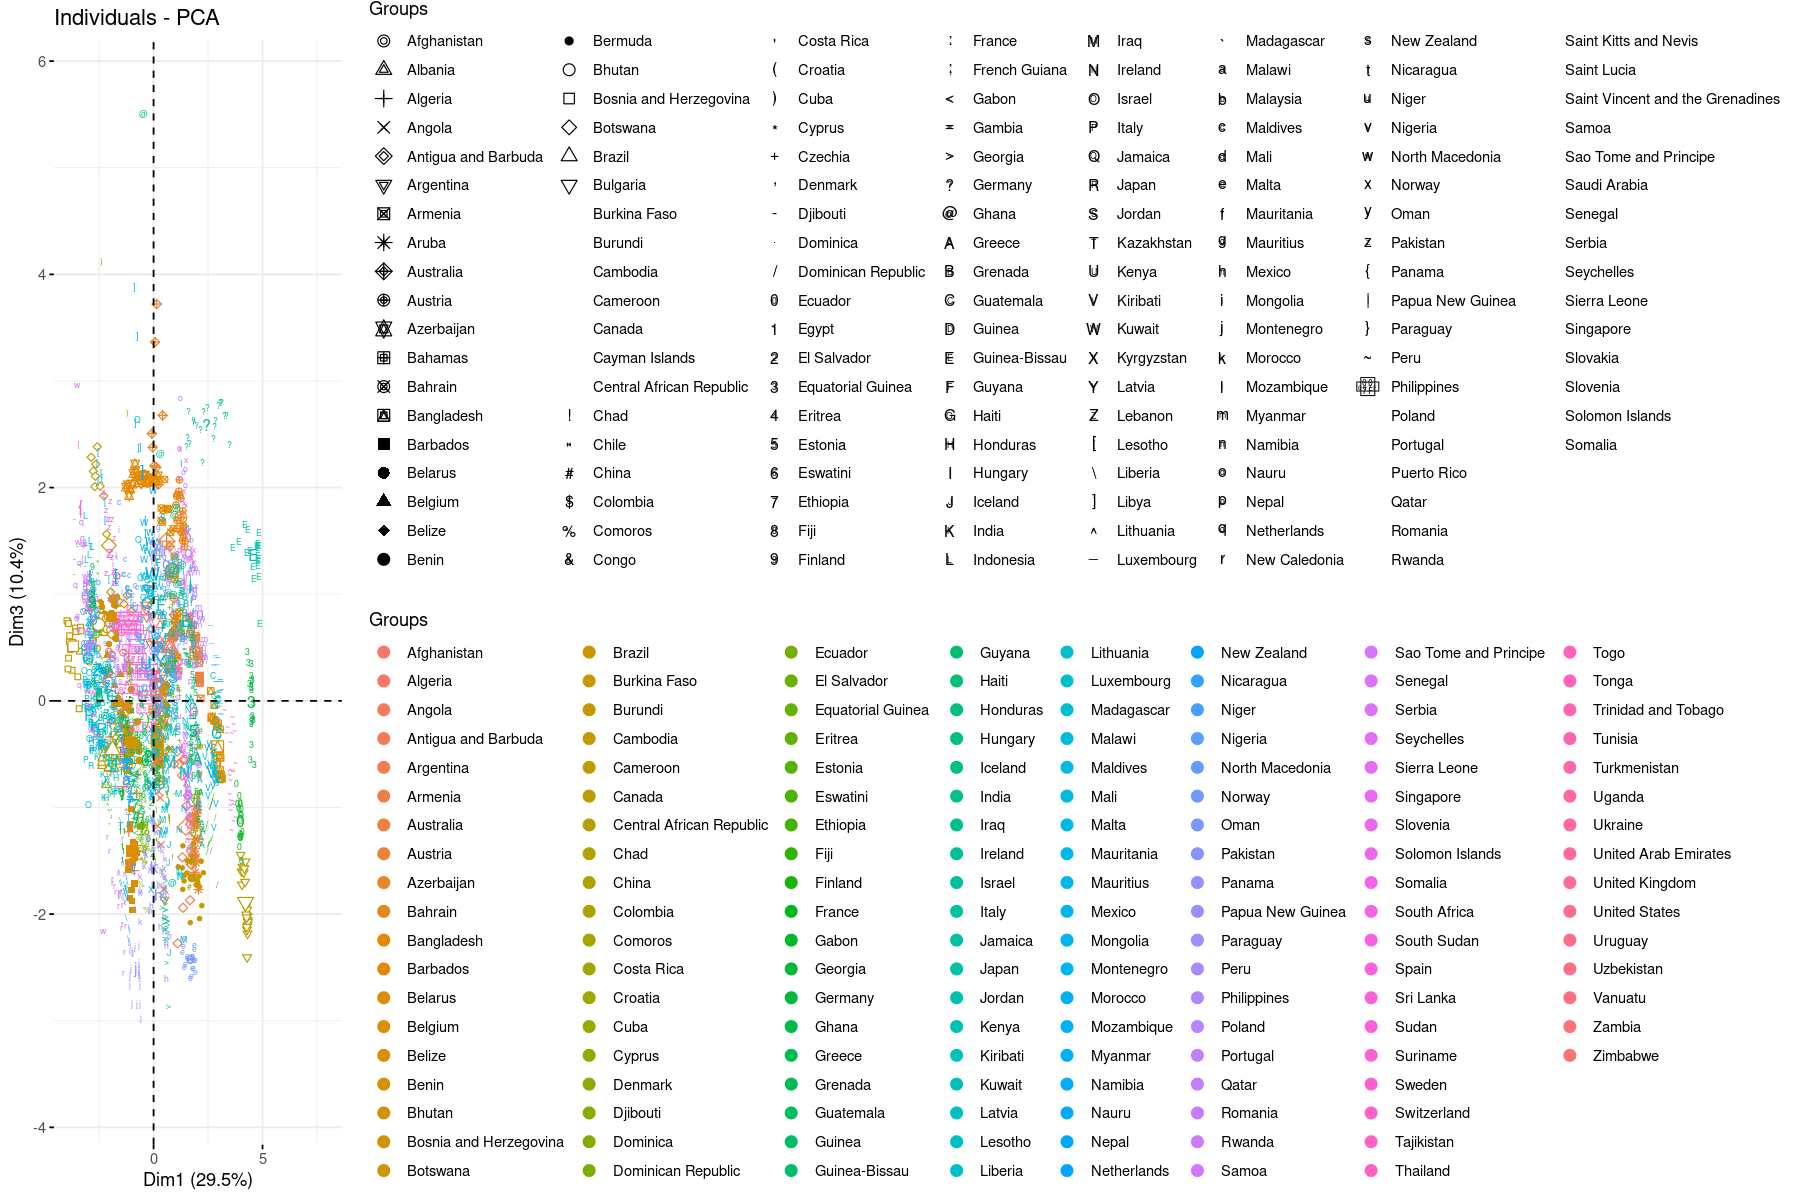

In [80]:
fviz_pca_var(acp,axes=c(1,3))
# fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
# fviz_pca_ind(acp, label="none", habillage=data5$Year, axes=c(1,3))
fviz_pca_ind(acp, label="none", habillage=data5$Entity, axes=c(1,3))

Il faudrait tenter d'afficher les differents graphes en fonction des differentes dimensions pour voir si on peut voir quelle composante représente à peu près quoi (comme en AdD en gros).

In [82]:
# ca marche pas lolilol
# data_reduced <- predict(acp)